<h1 style="text-align: center;"> <b> Parkinson's Disease Predictive Machine Learning Model </b></h1>

<h2 style="text-align: center;"> PART 2. Training and Testing of Machine Learning Predictive Models </h2>

<h5 style="text-align: center;"> Luna Pérez Troncoso </h5>
   
<br/><br/>
   
#### **Preparation and data loading**

In this Notebook we are going to explore the different Machine Learning classification models that we can use in order to predict the diagnosis of Parkinson's Disease in this dataset. **Numpy and Pandas** libraries are required in order to **load and handle data**. **Imbalance correction imblearn module Pipelines and SMOTENC** over-sampling algorithms was applied. In order to preprocess the data, Scaling and Standarization was applied using MinMaxScaler and StandardScaler of the sklearn preprocessing module. For **Feature Selection SelectKBest,RFE and RFECV** were loaded. Aditionally, some of the models perform **dimensionallity reduction and classification** with LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis **discriminant analysis** algorithms. **Different classification models** were tested: linear models (Logistic Regression), suport vector machines, supervised neighbors-based learning methods (K-Neighbors Classifiers) and ensemble models (Random Forest , Extra Trees, Extreme Gradiente Boosting, Light Gradient Boosting, Voting and Stacking Classifiers). For **model selection and cross-validation** we employed **GridSearchCV and RandomizedSearchCV** in combination with pipelines.**Matplotlib Pyplot module** and **sklearn metrics module** is going to be required for **graphical and numerical representations of the performance of the predictive models**. Finally, **Pickle** library will **save the predictive models with the best performances**.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, recall_score, roc_auc_score,RocCurveDisplay, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as iPipeline
from imblearn.metrics import specificity_score, sensitivity_score
from lightgbm import LGBMClassifier
import pickle

Previously splited train and test datasets were loaded

In [3]:
train_df=pd.read_csv("../data/train.csv",index_col=0)
test_df=pd.read_csv("../data/test.csv",index_col=0)

The train and test dataframes were divided in features (X) and target (y)

In [4]:
y_train=train_df["Diagnosis"]
X_train=train_df.drop(["Diagnosis"],axis=1)
y_test=test_df["Diagnosis"]
X_test=test_df.drop(["Diagnosis"],axis=1)
print("The X_train dataset contains",X_train.shape[1],"different features and with",X_train.shape[0],"records")
print("The X_test dataset contains",X_test.shape[1],"different features and with",X_test.shape[0],"records")

The X_train dataset contains 32 different features and with 1684 records
The X_test dataset contains 32 different features and with 421 records


#### **Linear Models: Logistic Regression Based Classification**
-  **Model Selection and Cross-Validation**   
   
Logistic regression hiperparameters were fine-tuned using grid search cross-validation with different hiperparameters combinations:  
   
- Scaling and Standarization Methods: None, MinMaxScaler, StandardScaler. *Although Logistic Regression Algorithms require Standarization/Scaling, due to its fast performance None option was added too*
         
- Feature Selection Algorithms: None, LinearDiscriminantAnalysis, SelectKBest(with K between 6 and 32)
- Logistic Regression Penalty: None, l1, l2, and elasticnet (with different l1_ratios)
- Logistic Regression C: numbers spaced evenly on a log scale
- Logistic Regression Solver: liblinear, lbfgs, newton-cg, newton-cholesky, sag, saga

In [29]:
steps_log=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',LogisticRegression(max_iter=1000000))]
pipe_log=Pipeline(steps=steps_log)

params_log1={"scaler":[MinMaxScaler(),StandardScaler(),None],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(6,33),
            'classifier':[LogisticRegression(max_iter=1000000,penalty=None)],
            "classifier__C":[0.001,0.01,0.1,1,10,100,1000],
            "classifier__solver":['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

params_log2={"scaler":[MinMaxScaler(),StandardScaler(),None],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(6,33),
            'classifier':[LogisticRegression(max_iter=1000000,penalty='l1')],
            "classifier__C":[0.001,0.01,0.1,1,10,100,1000],
            "classifier__solver":['liblinear', 'saga']

}

params_log3={"scaler":[MinMaxScaler(),StandardScaler(),None],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(6,33),
            'classifier':[LogisticRegression(max_iter=1000000,penalty='l2')],
            "classifier__C":[0.001,0.01,0.1,1,10,100,1000],
            "classifier__solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

params_log4={"scaler":[MinMaxScaler(),StandardScaler(),None],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(6,33),
            'classifier':[LogisticRegression(max_iter=1000000,penalty='elasticnet',solver='saga')],
            "classifier__C":[0.001,0.01,0.1,1,10,100,1000],
            "classifier__l1_ratio":[0.2,0.4,0.6,0.8]
}

params_log=[params_log1,params_log2,params_log3,params_log4]


gs_log=GridSearchCV(estimator=pipe_log,param_grid=params_log,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_log.fit(X_train,y_train)

Fitting 5 folds for each of 9639 candidates, totalling 48195 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000000))]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000000,
                                                            penalty=None)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__solver': ['lbfgs', 'newton-cg',
                                                 'newton-cho...
                          'scaler': [MinMaxScaler(), StandardScaler(), None]},
                         {'classifier': [LogisticRegression(max_iter=1000000,
                                                            penalty='elasticnet',
                                                            solver='saga')],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'classifier__l1_ratio': [0.2, 0.4, 0.6, 0.8],
                          'feature_selection': [SelectKBest()],
                          'feature_selection__k': range(6, 33),
                          'scaler': [MinMaxScaler(), StandardScaler(), None]}],
             scoring='accuracy', verbose=2)

In [30]:
print(gs_log.best_estimator_)
print(gs_log.best_score_)
print(gs_log.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 LogisticRegression(C=0.1, l1_ratio=0.2, max_iter=1000000,
                                    penalty='elasticnet', solver='saga'))])
0.825406245584287
{'classifier': LogisticRegression(max_iter=1000000, penalty='elasticnet', solver='saga'), 'classifier__C': 0.1, 'classifier__l1_ratio': 0.2, 'feature_selection': SelectKBest(), 'feature_selection__k': 15, 'scaler': StandardScaler()}


Logistic Regression Model Accuracy Score:
 0.8099762470308789

Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       162
           1       0.85      0.85      0.85       259

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421




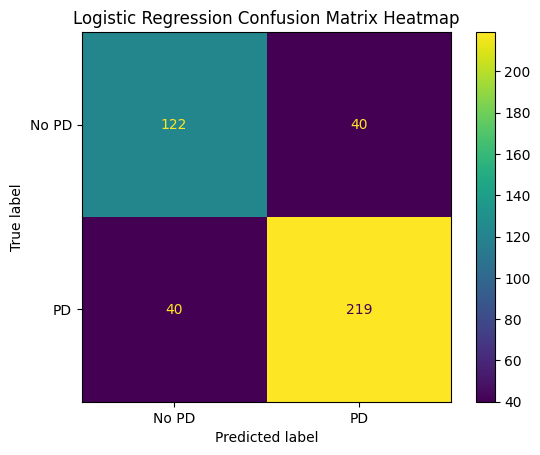

In [86]:
y_pred_log=gs_log.predict(X_test)
print("Logistic Regression Model Accuracy Score:\n", accuracy_score(y_test,y_pred_log))
print("")
print("Logistic Regression Model Classification Report:\n", classification_report(y_test,y_pred_log))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log,display_labels=["No PD","PD"])
plt.title("Logistic Regression Confusion Matrix Heatmap")
plt.show()

In [446]:
steps_log2=[("scaler",StandardScaler()),("feature_selection",LinearDiscriminantAnalysis()),('classifier',LogisticRegression(max_iter=1000000))]
pipe_log2=Pipeline(steps=steps_log2)

params_log1={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[LinearDiscriminantAnalysis()],
            'classifier':[LogisticRegression(max_iter=1000000,penalty=None)],
            "classifier__C": np.logspace(0.0001,10,200),
            "classifier__solver":['newton-cholesky']
}

params_log2={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[LinearDiscriminantAnalysis()],
            'classifier':[LogisticRegression(max_iter=1000000,penalty='l1')],
            "classifier__C": np.logspace(0.0001,10,200),
            "classifier__solver":['liblinear']

}

params_log3={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[LinearDiscriminantAnalysis()],
            'classifier':[LogisticRegression(max_iter=1000000,penalty='l2')],
            "classifier__C": np.logspace(0.0001,10,200),
            "classifier__solver":['liblinear', 'newton-cholesky']
}

params_log4={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[LinearDiscriminantAnalysis()],
            'classifier':[LogisticRegression(max_iter=1000000,penalty='elasticnet',solver='saga')],
            "classifier__C": np.logspace(0.0001,10,200),
            "classifier__l1_ratio": np.arange(0.05,1,0.05)
}
params_log=[params_log1,params_log2,params_log3,params_log4]


gs_log2=GridSearchCV(estimator=pipe_log2,param_grid=params_log,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_log2.fit(X_train,y_train)

Fitting 5 folds for each of 9200 candidates, totalling 46000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        LinearDiscriminantAnalysis()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000000))]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000000,
                                                            penalty=None)],
                          'classifier__C': array([1.00023029e+00, 1.12292501e+00, 1.26067026e+00, 1.41531224e+00,
       1....
       4.44881886e+09, 4.99453979e+09, 5.60720238e+09, 6.29501813e+09,
       7.06720581e+09, 7.93411503e+09, 8.90736495e+09, 1.00000000e+10]),
                          'classifier__l1_ratio': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                          'feature_selection': [LinearDiscriminantAnalysis()],
                          'scaler': [MinMaxScaler(), StandardScaler()]}],
             scoring='accuracy', verbose=2)

Logistic Regression Model 2 Accuracy Score:
 0.8028503562945368

Logistic Regression Model 2 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       162
           1       0.82      0.86      0.84       259

    accuracy                           0.80       421
   macro avg       0.79      0.78      0.79       421
weighted avg       0.80      0.80      0.80       421




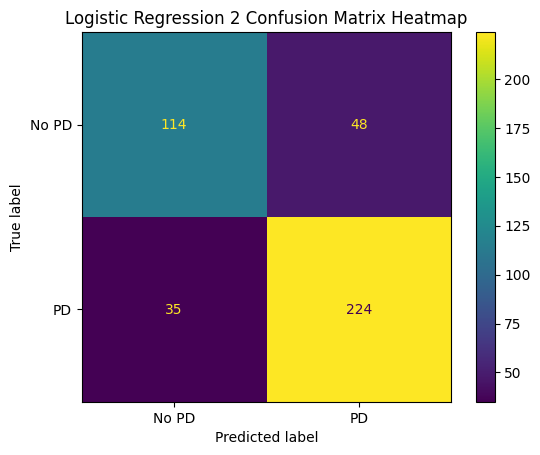

In [447]:
y_pred_log2=gs_log2.predict(X_test)
print("Logistic Regression Model 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_log))
print("")
print("Logistic Regression Model 2 Classification Report:\n", classification_report(y_test,y_pred_log))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log,display_labels=["No PD","PD"])
plt.title("Logistic Regression 2 Confusion Matrix Heatmap")
plt.show()

In [57]:
steps_log3=[("scaler",StandardScaler()),("feature_selection",LinearDiscriminantAnalysis()),('classifier',LogisticRegression(max_iter=1000000))]
pipe_log3=Pipeline(steps=steps_log3)

params_log4={"scaler":[MinMaxScaler(),StandardScaler(),None],
            "feature_selection":[LinearDiscriminantAnalysis()],
            'classifier':[LogisticRegression(max_iter=1000000,penalty='elasticnet',solver='saga')],
            "classifier__C": np.logspace(0.001,1,200),
            "classifier__l1_ratio": np.arange(0.05,1,0.05)
}

gs_log3=GridSearchCV(estimator=pipe_log3,param_grid=params_log4,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_log3.fit(X_train,y_train)


Fitting 5 folds for each of 11400 candidates, totalling 57000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        LinearDiscriminantAnalysis()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000000))]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(max_iter=1000000,
                                                           penalty='elasticnet',
                                                           solver='saga')],
                         'classifier__C': array([ 1.00230524,  1.01395831,  1.02574687,  1.037672...
        9.01195668,  9.11673216,  9.22272579,  9.32995173,  9.43842431,
        9.54815802,  9.65916753,  9.77146766,  9.88507342, 10.        ]),
                         'classifier__l1_ratio': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'feature_selection': [LinearDiscriminantAnalysis()],
                         'scaler': [MinMaxScaler(), StandardScaler(), None]},
             scoring='accuracy', verbose=2)

Logistic Regression Model 3 Accuracy Score:
 0.8052256532066508

Logistic Regression Model 3 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       162
           1       0.84      0.84      0.84       259

    accuracy                           0.81       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.81      0.81      0.81       421




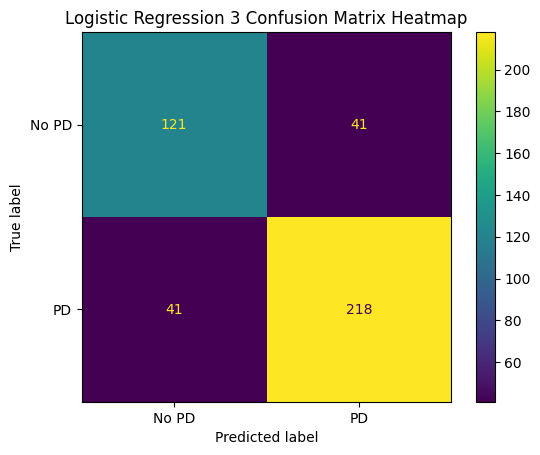

In [321]:
y_pred_log3=gs_log3.predict(X_test)
print("Logistic Regression Model 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_log3))
print("")
print("Logistic Regression Model 3 Classification Report:\n", classification_report(y_test,y_pred_log3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log3,display_labels=["No PD","PD"])
plt.title("Logistic Regression 3 Confusion Matrix Heatmap")
plt.show()

In [54]:
steps_log4=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',LogisticRegression(max_iter=1000000))]
pipe_log4=Pipeline(steps=steps_log4)
params_log4={"scaler":[StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(12,33),
            'classifier':[LogisticRegression(max_iter=1000000,penalty='elasticnet',solver='saga')],
            "classifier__C":np.logspace(0.01,1,100),
            "classifier__l1_ratio":np.arange(0.05,1,0.05)
}

gs_log4=GridSearchCV(estimator=pipe_log,param_grid=params_log4,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_log4.fit(X_train,y_train)

Fitting 5 folds for each of 39900 candidates, totalling 199500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        LinearDiscriminantAnalysis()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000000))]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(max_iter=1000000,
                                                           penalty='elasticnet',
                                                           solver='saga')],
                         'classifier__C': array([ 1.02329299,  1.04712855,  1.07151931,  1.096478...
        8.12830516,  8.31763771,  8.51138038,  8.7096359 ,  8.91250938,
        9.12010839,  9.33254301,  9.54992586,  9.77237221, 10.        ]),
                         'classifier__l1_ratio': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [StandardScaler()]},
             scoring='accuracy', verbose=2)

Logistic Regression 4 Model Accuracy Score:
 0.8099762470308789

Logistic Regression 4 Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       162
           1       0.85      0.84      0.84       259

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421




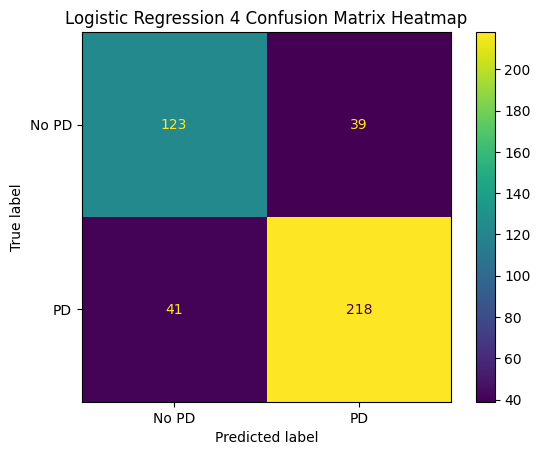

In [448]:
y_pred_log4=gs_log4.predict(X_test)
print("Logistic Regression 4 Model Accuracy Score:\n", accuracy_score(y_test,y_pred_log4))
print("")
print("Logistic Regression 4 Model Classification Report:\n", classification_report(y_test,y_pred_log4))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log4,display_labels=["No PD","PD"])
plt.title("Logistic Regression 4 Confusion Matrix Heatmap")
plt.show()

-  **Best Logistic Regression model**
  
The best logistic regression model had the following steps and hiperparameters combination:  
   
- Scaling and Standarization Method: StandardScaler
- Feature Selection Algorithms: SelectKBest(with k=15)
- Logistic Regression Penalty: elasticnet (with 0.05 l1_ratio)
- Logistic Regression C: 1.023292992280754
- Logistic Regression Solver: saga


In [445]:
gs_log4

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        LinearDiscriminantAnalysis()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000000))]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(max_iter=1000000,
                                                           penalty='elasticnet',
                                                           solver='saga')],
                         'classifier__C': array([ 1.02329299,  1.04712855,  1.07151931,  1.096478...
        8.12830516,  8.31763771,  8.51138038,  8.7096359 ,  8.91250938,
        9.12010839,  9.33254301,  9.54992586,  9.77237221, 10.        ]),
                         'classifier__l1_ratio': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [StandardScaler()]},
             scoring='accuracy', verbose=2)

Logistic Regression 4 Model Accuracy Score:
 0.8099762470308789

Logistic Regression 4 Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       162
           1       0.85      0.84      0.84       259

    accuracy                           0.81       421
   macro avg       0.80      0.80      0.80       421
weighted avg       0.81      0.81      0.81       421




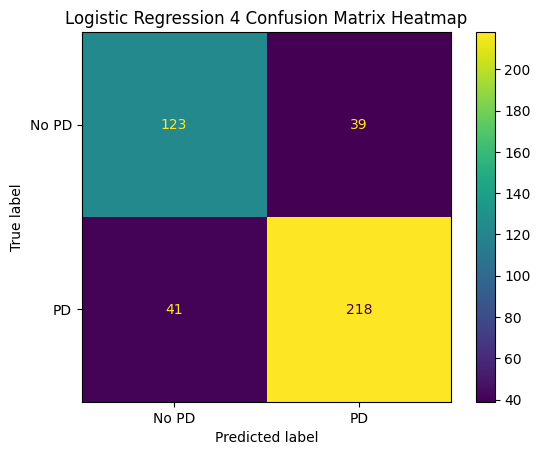

In [319]:
y_pred_log4=gs_log4.predict(X_test)
print("Logistic Regression 4 Model Accuracy Score:\n", accuracy_score(y_test,y_pred_log4))
print("")
print("Logistic Regression 4 Model Classification Report:\n", classification_report(y_test,y_pred_log4))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log4,display_labels=["No PD","PD"])
plt.title("Logistic Regression 4 Confusion Matrix Heatmap")
plt.show()

In [56]:
log_best_model=gs_log4.best_estimator_
with open('../models/logistic_regression_model', 'wb') as archivo_salida:
    pickle.dump(log_best_model, archivo_salida)

#### **Discriminant Analysis: Quadratic Discriminant Analysis Based Classification**
-  **Model Testing**  
  
Quadratic Discriminant Analysis as a Classification Model was tested with poor results.

In [5]:
steps_qda=[("scaler",StandardScaler()),('classifier',QuadraticDiscriminantAnalysis())]
pipe_qda=Pipeline(steps=steps_qda)
pipe_qda.fit(X_train,y_train)
pipe_qda

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', QuadraticDiscriminantAnalysis())])

Quadratic Discriminant Analysis Accuracy Score:
 0.7600950118764845

Quadratic Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       162
           1       0.80      0.81      0.81       259

    accuracy                           0.76       421
   macro avg       0.75      0.74      0.75       421
weighted avg       0.76      0.76      0.76       421




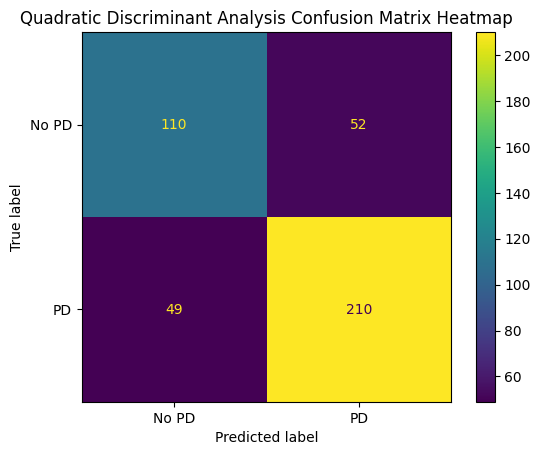

In [ ]:
y_pred_qda=pipe_qda.predict(X_test)
print("Quadratic Discriminant Analysis Accuracy Score:\n", accuracy_score(y_test,y_pred_qda))
print("")
print("Quadratic Discriminant Analysis Classification Report:\n", classification_report(y_test,y_pred_qda))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_qda,display_labels=["No PD","PD"])
plt.title("Quadratic Discriminant Analysis Confusion Matrix Heatmap")
plt.show()

In [ ]:
with open('../models/qda_model', 'wb') as archivo_salida:
    pickle.dump(pipe_qda, archivo_salida)

#### **Support Vector Machines: Lineal, Polinomic and Gaussian Kernel Support Vector Classifier (SVC)**
- **SVC with Linear Kernel Model Selection and Cross-Validation**

SVC with Linear Kernel hiperparameters were selected using grid search cross-validation with the following hiperparameters combinations:  
   
- Scaling and Standarization Methods: MinMaxScaler, StandardScaler
- Feature Selection Algorithms: SelectKBest(with K between 12 and 32)
- SVC C: numbers spaced evenly on a log scale


In [64]:
steps_svc=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',SVC())]
pipe_svc=Pipeline(steps=steps_svc)

params_svc={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(12,33),
            "classifier__kernel":['linear'],
            "classifier__C":[0.001,0.01,0.1,1,10,100],
}

gs_svc=GridSearchCV(estimator=pipe_svc,param_grid=params_svc,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_svc.fit(X_train,y_train)

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__kernel': ['linear'],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with Lineal Kernel Model Accuracy Score:
 0.7980997624703088

Support Vector Classifier with Lineal Kernel Model Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       162
           1       0.83      0.84      0.84       259

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421




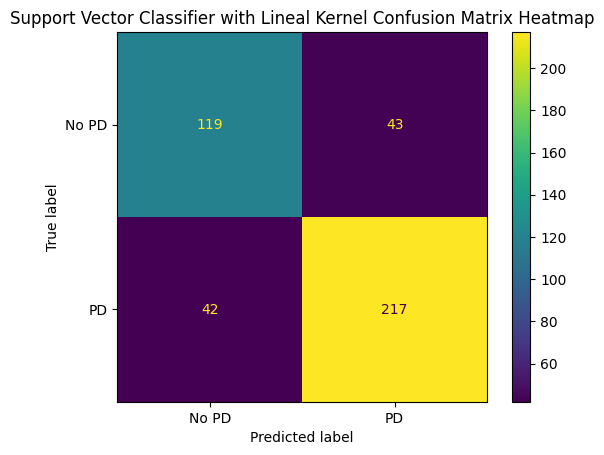

In [314]:
y_pred_svc_k_l=gs_svc.predict(X_test)
print("Support Vector Classifier with Lineal Kernel Model Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_l))
print("")
print("Support Vector Classifier with Lineal Kernel Model Classification Report:\n", classification_report(y_test,y_pred_svc_k_l))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_l,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Lineal Kernel Confusion Matrix Heatmap")
plt.show()

In [101]:
steps_svc2=[("scaler",StandardScaler()),("feature_selection",SelectKBest(k=15)),('classifier',SVC())]
pipe_svc2=Pipeline(steps=steps_svc2)

params_svc2={"scaler":[StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": [15],
            "classifier__kernel":['linear'],
            "classifier__C":np.arange(0.01,1,0.01)
}


gs_svc2=GridSearchCV(estimator=pipe_svc2,param_grid=params_svc2,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_svc2.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest(k=15)),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.3...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'classifier__kernel': ['linear'],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [15],
                         'scaler': [StandardScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with Lineal Kernel 2 Accuracy Score:
 0.7933491686460807

Support Vector Classifier with Lineal Kernel 2 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       162
           1       0.83      0.84      0.83       259

    accuracy                           0.79       421
   macro avg       0.78      0.78      0.78       421
weighted avg       0.79      0.79      0.79       421




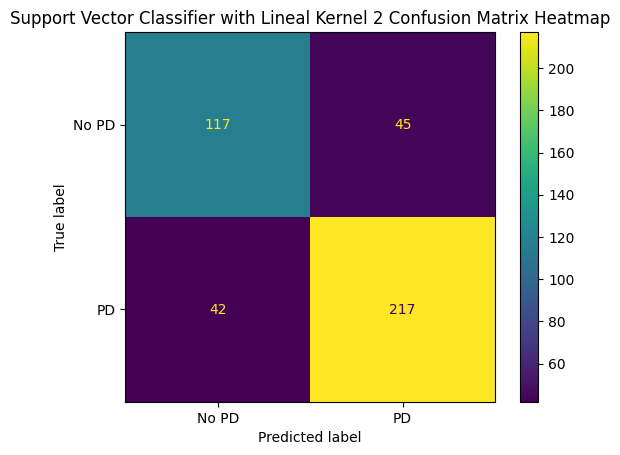

In [315]:
y_pred_svc_k_l2=gs_svc2.predict(X_test)
print("Support Vector Classifier with Lineal Kernel 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_l2))
print("")
print("Support Vector Classifier with Lineal Kernel 2 Classification Report:\n", classification_report(y_test,y_pred_svc_k_l2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_l2,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Lineal Kernel 2 Confusion Matrix Heatmap")
plt.show()

- **Best SVC with lineal kernel Model**

SVC with Linear Kernel hiperparameters were selected using grid search cross-validation with the following hiperparameters combinations:  
   
- Scaling and Standarization Methods: StandardScaler
- Feature Selection Algorithms: SelectKBest(with k=15)
- SVC C hiperparameter: 0.1


In [466]:
gs_svc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__kernel': ['linear'],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with Lineal Kernel Model Accuracy Score:
 0.7980997624703088

Support Vector Classifier with Lineal Kernel Model Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       162
           1       0.83      0.84      0.84       259

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421




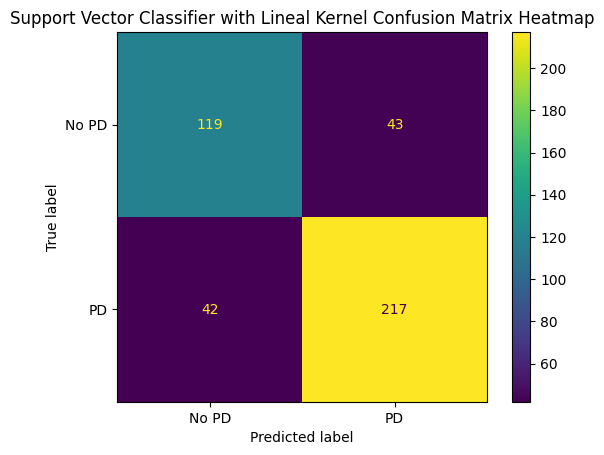

In [467]:
y_pred_svc_k_l=gs_svc.predict(X_test)
print("Support Vector Classifier with Lineal Kernel Model Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_l))
print("")
print("Support Vector Classifier with Lineal Kernel Model Classification Report:\n", classification_report(y_test,y_pred_svc_k_l))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_l,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Lineal Kernel Confusion Matrix Heatmap")
plt.show()

In [66]:
svc_k_l_best_model=gs_svc.best_estimator_
with open('../models/svc_k_l_model', 'wb') as archivo_salida:
    pickle.dump(svc_k_l_best_model, archivo_salida)

- **Linear SVC Model Selection and Cross-Validation**  
   
Lineal SVC hiperparameters were cross-validated using GridSearchCV funtion with this hiperparameters grid:  
   
- Scaling and Standarization Methods: MinMaxScaler, StandardScaler
- Feature Selection Algorithms: SelectKBest(with K between 12 and 32)
- SVC C: numbers spaced evenly on a log scale


In [ ]:
steps_lsvc=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',LinearSVC())]
pipe_lsvc=Pipeline(steps=steps_lsvc)

params_lsvc={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": np.arange(12,33),
            "classifier__C":np.arange(0.0001,0.01,0.0001),
}

gs_lsvc=GridSearchCV(estimator=pipe_lsvc,param_grid=params_lsvc,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_lsvc.fit(X_train,y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', LinearSVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0....
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099]),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [13],
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

- **Best Linear SVC Model**  
   
Lineal SVC best model had the following combination:  
   
- Scaling and Standarization Methods: StandardScaler
- Feature Selection Algorithms: SelectKBest(with k of 13)
- SVC C Hiperparameter: 0.001

In [468]:
gs_lsvc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', LinearSVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0....
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072,
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099]),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [13],
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

Lineal Support Vector Classifier Accuracy Score:
 0.8004750593824228

Lineal Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       162
           1       0.84      0.84      0.84       259

    accuracy                           0.80       421
   macro avg       0.79      0.79      0.79       421
weighted avg       0.80      0.80      0.80       421




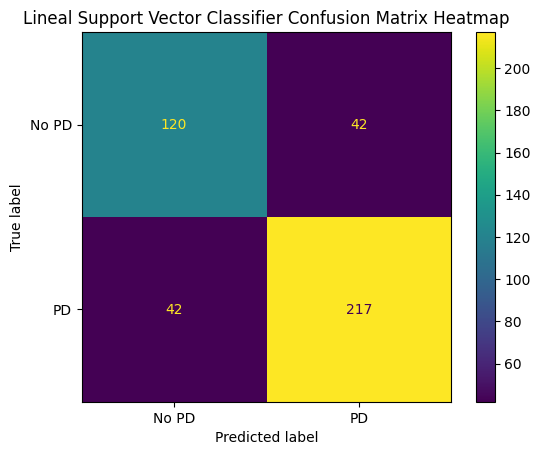

In [316]:
y_pred_lsvc=gs_lsvc.predict(X_test)
print("Lineal Support Vector Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_lsvc))
print("")
print("Lineal Support Vector Classifier Classification Report:\n", classification_report(y_test,y_pred_lsvc))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lsvc,display_labels=["No PD","PD"])
plt.title("Lineal Support Vector Classifier Confusion Matrix Heatmap")
plt.show()

In [97]:
lsvc_best_model=gs_lsvc.best_estimator_
with open('../models/lsvc_model', 'wb') as archivo_salida:
    pickle.dump(lsvc_best_model, archivo_salida)

- **SVC with Gaussian Kernel Model Selection and Cross-Validation**

SVC with Gaussian Kernel hiperparameters were fine-tuned by grid search cross-validation with the following hiperparameters combinations:  
   
- Scaling and Standarization Methods: MinMaxScaler, StandardScaler
- Feature Selection Algorithms: SelectKBest(with K between 12 and 32)
- SVC C: numbers spaced evenly on a log scale
- SVC gamma: numbers spaced evenly on a log scale

In [112]:
steps_svc3=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',SVC())]
pipe_svc3=Pipeline(steps=steps_svc3)

params_svc3={"scaler":[StandardScaler(),MinMaxScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": np.arange(12,33),
            "classifier__C":[0.0001,0.001,0.01,0.1,1,10,100,1000],
            "classifier__gamma":[0.0001,0.001,0.01,0.1,1,10,100,1000]
}


gs_svc3=GridSearchCV(estimator=pipe_svc3,param_grid=params_svc3,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_svc3.fit(X_train,y_train)


Fitting 5 folds for each of 2688 candidates, totalling 13440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000],
                         'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                               100, 1000],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32]),
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with Gaussian Kernel Accuracy Score:
 0.8479809976247031

Support Vector Classifier with Gaussian Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       162
           1       0.85      0.91      0.88       259

    accuracy                           0.85       421
   macro avg       0.85      0.83      0.84       421
weighted avg       0.85      0.85      0.85       421




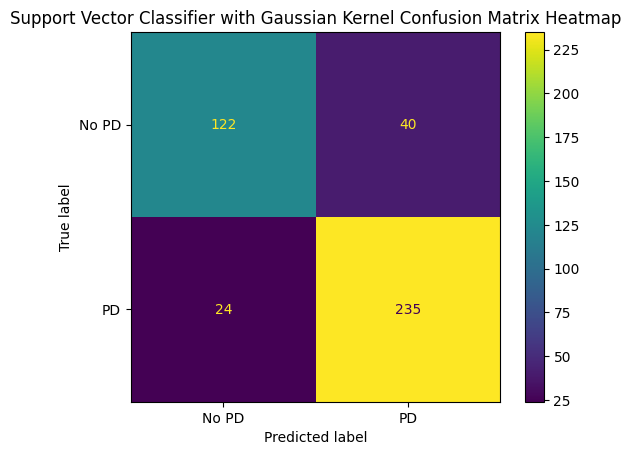

In [317]:
y_pred_svc_k_g=gs_svc3.predict(X_test)
print("Support Vector Classifier with Gaussian Kernel Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_g))
print("")
print("Support Vector Classifier with Gaussian Kernel Classification Report:\n", classification_report(y_test,y_pred_svc_k_g))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_g,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Gaussian Kernel Confusion Matrix Heatmap")
plt.show()

In [117]:
steps_svc4=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',SVC())]
pipe_svc4=Pipeline(steps=steps_svc4)

params_svc4={"scaler":[StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": [13],
            "classifier__C":[1.8],
            "classifier__gamma":np.arange(0.01,1,0.01)
}


gs_svc4=GridSearchCV(estimator=pipe_svc4,param_grid=params_svc4,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_svc4.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [1.8],
                         'classifier__gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [13],
                         'scaler': [StandardScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with Gaussian Kernel 2 Accuracy Score:
 0.8622327790973872

Support Vector Classifier with Gaussian Kernel 2 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       162
           1       0.87      0.91      0.89       259

    accuracy                           0.86       421
   macro avg       0.86      0.85      0.85       421
weighted avg       0.86      0.86      0.86       421




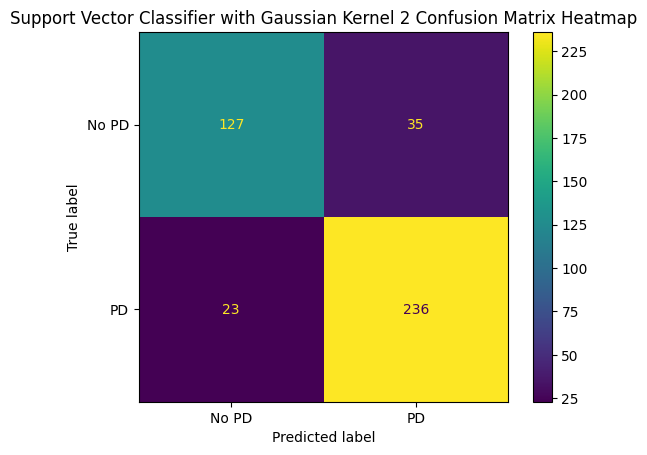

In [318]:
y_pred_svc_k_g2=gs_svc4.predict(X_test)
print("Support Vector Classifier with Gaussian Kernel 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_g2))
print("")
print("Support Vector Classifier with Gaussian Kernel 2 Classification Report:\n", classification_report(y_test,y_pred_svc_k_g2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_g2,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Gaussian Kernel 2 Confusion Matrix Heatmap")
plt.show()

- **Best SVC with Gaussian Kernel:**  
   
In the case of SVC with gaussian kernel the best model obtained had:
- Scaling and Standarization Methods: StandardScaler
- Feature Selection Algorithms: SelectKBest(k=13)
- SVC C: 1.8
- SVC gamma: 0.001

In [469]:
gs_svc4

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [1.8],
                         'classifier__gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [13],
                         'scaler': [StandardScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with Gaussian Kernel 2 Accuracy Score:
 0.8622327790973872

Support Vector Classifier with Gaussian Kernel 2 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       162
           1       0.87      0.91      0.89       259

    accuracy                           0.86       421
   macro avg       0.86      0.85      0.85       421
weighted avg       0.86      0.86      0.86       421




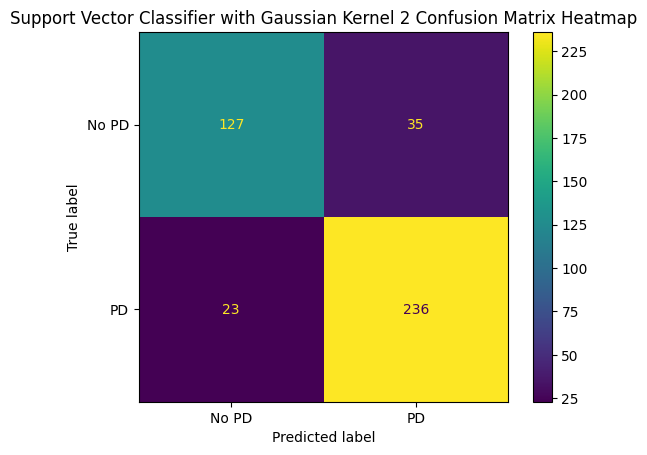

In [470]:
y_pred_svc_k_g2=gs_svc4.predict(X_test)
print("Support Vector Classifier with Gaussian Kernel 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_g2))
print("")
print("Support Vector Classifier with Gaussian Kernel 2 Classification Report:\n", classification_report(y_test,y_pred_svc_k_g2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_g2,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Gaussian Kernel 2 Confusion Matrix Heatmap")
plt.show()

In [119]:
svc_k_g_best_model=gs_svc4.best_estimator_
with open('../models/svc_k_g_model', 'wb') as archivo_salida:
    pickle.dump(svc_k_g_best_model, archivo_salida)

- **SVC with Polynomic Kernel Model Selection and Cross-Validation:**  

For SVC with polynomic kernel the same procedure was carried out with these hiperparameters combinations:  
   
- Scaling and Standarization Methods: MinMaxScaler, StandardScaler
- Feature Selection Algorithms: SelectKBest(with K between 12 and 32)
- SVC Polynomial Degree: 2 and 3
- SVC C: numbers spaced evenly on a log scale
- SVC gamma: numbers spaced evenly on a log scale

In [124]:
steps_svc5=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',SVC())]
pipe_svc5=Pipeline(steps=steps_svc5)

params_svc5={"scaler":[StandardScaler(),MinMaxScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": np.arange(12,22),
            "classifier__kernel":['poly'],
            "classifier__C":[0.0001,0.001,0.01,0.1,1,10],
            "classifier__gamma":[0.0001,0.001,0.01,0.1,1,10]
}


gs_svc5=GridSearchCV(estimator=pipe_svc5,param_grid=params_svc5,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_svc5.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'classifier__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'classifier__kernel': ['poly'],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with polinomial kernel Accuracy Score:
 0.8242280285035629

Support Vector Classifier with polinomial kernel Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       162
           1       0.86      0.86      0.86       259

    accuracy                           0.82       421
   macro avg       0.81      0.81      0.81       421
weighted avg       0.82      0.82      0.82       421




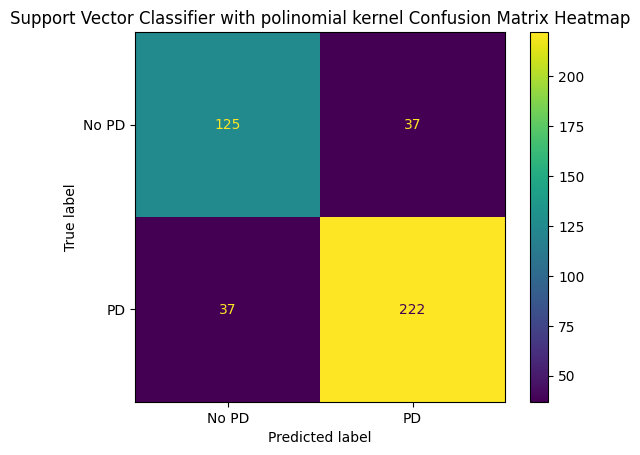

In [ ]:
y_pred_svc_k_p=gs_svc5.predict(X_test)
print("Support Vector Classifier with Polinomial Kernel Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_p))
print("")
print("Support Vector Classifier with Polinomial Kernel Classification Report:\n", classification_report(y_test,y_pred_svc_k_p))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_p,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with Polinomial Kernel Confusion Matrix Heatmap")
plt.show()

In [ ]:
steps_svc6=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',SVC(kernel='poly',degree=2))]
pipe_svc6=Pipeline(steps=steps_svc6)

params_svc6={"scaler":[MinMaxScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": [12],
            "classifier__kernel":['poly'],
            "classifier__degree":['2'],
            "classifier__C":np.arange(0.0001,0.01,0.0001),
            "classifier__gamma":[16.3]
}


gs_svc6=GridSearchCV(estimator=pipe_svc6,param_grid=params_svc6,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_svc6.fit(X_train,y_train)
#pipe_svc6.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier',
                                        SVC(degree=2, kernel='poly'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022,...
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099]),
                         'classifier__gamma': [16.3],
                         'classifier__kernel': ['poly'],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [12],
                         'scaler': [MinMaxScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with polinomial kernel 2 Accuracy Score:
 0.828978622327791

Support Vector Classifier with polinomial kernel 2 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       162
           1       0.86      0.86      0.86       259

    accuracy                           0.83       421
   macro avg       0.82      0.82      0.82       421
weighted avg       0.83      0.83      0.83       421




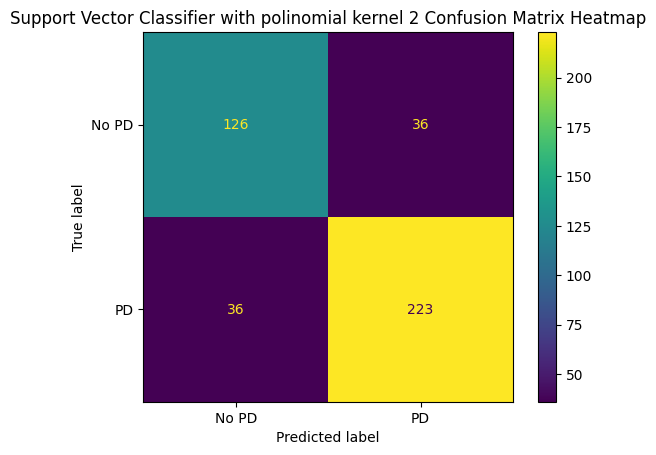

In [312]:
y_pred_svc_k_p2=gs_svc6.predict(X_test)
print("Support Vector Classifier with polinomial kernel 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_p2))
print("")
print("Support Vector Classifier with polinomial kernel 2 Classification Report:\n", classification_report(y_test,y_pred_svc_k_p2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_p2,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with polinomial kernel 2 Confusion Matrix Heatmap")
plt.show()

- **Best SVC with Polynomic Kernel Model**  

The best scores were obtained with the following combination:
   
- Scaling and Standarization Methods: MinMaxScaler
- Feature Selection Algorithms: SelectKBest(k=12)
- Polynomial Degree: 2
- SVC C: 0.001
- SVC gamma: 16.3

In [475]:
gs_svc6

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier',
                                        SVC(degree=2, kernel='poly'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022,...
       0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 ,
       0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088,
       0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096,
       0.0097, 0.0098, 0.0099]),
                         'classifier__gamma': [16.3],
                         'classifier__kernel': ['poly'],
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': [12],
                         'scaler': [MinMaxScaler()]},
             scoring='accuracy', verbose=2)

Support Vector Classifier with polinomial kernel 2 Accuracy Score:
 0.828978622327791

Support Vector Classifier with polinomial kernel 2 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       162
           1       0.86      0.86      0.86       259

    accuracy                           0.83       421
   macro avg       0.82      0.82      0.82       421
weighted avg       0.83      0.83      0.83       421




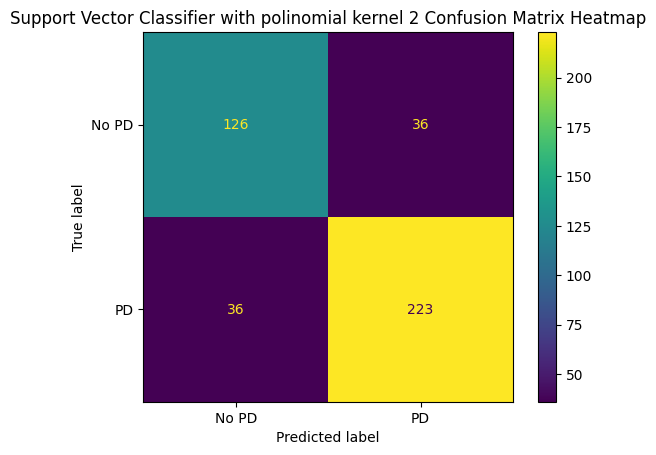

In [476]:
y_pred_svc_k_p2=gs_svc6.predict(X_test)
print("Support Vector Classifier with polinomial kernel 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_svc_k_p2))
print("")
print("Support Vector Classifier with polinomial kernel 2 Classification Report:\n", classification_report(y_test,y_pred_svc_k_p2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_k_p2,display_labels=["No PD","PD"])
plt.title("Support Vector Classifier with polinomial kernel 2 Confusion Matrix Heatmap")
plt.show()

In [138]:
svc_k_p_best_model=gs_svc6.best_estimator_
with open('../models/svc_k_p_model', 'wb') as archivo_salida:
    pickle.dump(svc_k_p_best_model, archivo_salida)

#### **Supervised Beighbors-based Learning Methods: K-Neighbors Classifier (KNN):**
-  **Model Selection and Cross-Validation**  
  
KNN hiperparameters were tested using grid search cross-validation choosing the following hiperparameters combinations:  
   
- Imbalance correction: SMOTENC, None
- Scaling and Standarization Methods: MinMaxScaler, StandardScaler. 
- Feature Selection Algorithms: SelectKBest(with K between 12 and 32)
- KNN Neighbors number: integer number between 2 and 10

In [79]:
steps_knn=[("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',KNeighborsClassifier())]
pipe_knn=Pipeline(steps=steps_knn)

params_knn={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(12,33),
            "classifier__n_neighbors":range(2,10),
}

gs_knn=GridSearchCV(estimator=pipe_knn,param_grid=params_knn,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': range(2, 10),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

K-Neighbor Classifier Accuracy Score:
 0.8266033254156769

K-Neighbor Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       162
           1       0.82      0.92      0.87       259

    accuracy                           0.83       421
   macro avg       0.83      0.80      0.81       421
weighted avg       0.83      0.83      0.82       421




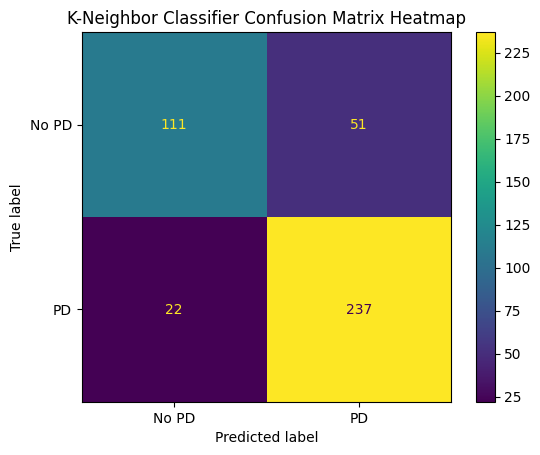

In [311]:
y_pred_knn=gs_knn.predict(X_test)
print("K-Neighbor Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_knn))
print("")
print("K-Neighbor Classifier Classification Report:\n", classification_report(y_test,y_pred_knn))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn,display_labels=["No PD","PD"])
plt.title("K-Neighbor Classifier Confusion Matrix Heatmap")
plt.show()

In [88]:
steps_knn2=[("imbalance",SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])),("scaler",StandardScaler()),("feature_selection",SelectKBest()),('classifier',KNeighborsClassifier())]
pipe_knn2=iPipeline(steps=steps_knn2)

params_knn2={"scaler":[MinMaxScaler(),StandardScaler()],
            "feature_selection":[SelectKBest()],
            "feature_selection__k": range(12,33),
            "classifier__n_neighbors":range(2,10),
}

gs_knn2=GridSearchCV(estimator=pipe_knn2,param_grid=params_knn2,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_knn2.fit(X_train,y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imbalance',
                                        SMOTENC(categorical_features=['Gender',
                                                                      'Ethnicity',
                                                                      'EducationLevel',
                                                                      'Smoking',
                                                                      'FamilyHistoryParkinsons',
                                                                      'TraumaticBrainInjury',
                                                                      'Hypertension',
                                                                      'Diabetes',
                                                                      'Depression',
                                                                      'Stroke',
                                                                      'Tremor',
                                                                      'Rigidity',
                                                                      'Bradykinesia',
                                                                      'PosturalInstability',
                                                                      'SpeechProblems',
                                                                      'SleepDisorders',
                                                                      'Constipation'])),
                                       ('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': range(2, 10),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

K-Neighbor Classifier 2 Accuracy Score:
 0.7553444180522565

K-Neighbor Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       162
           1       0.80      0.80      0.80       259

    accuracy                           0.76       421
   macro avg       0.74      0.74      0.74       421
weighted avg       0.76      0.76      0.76       421




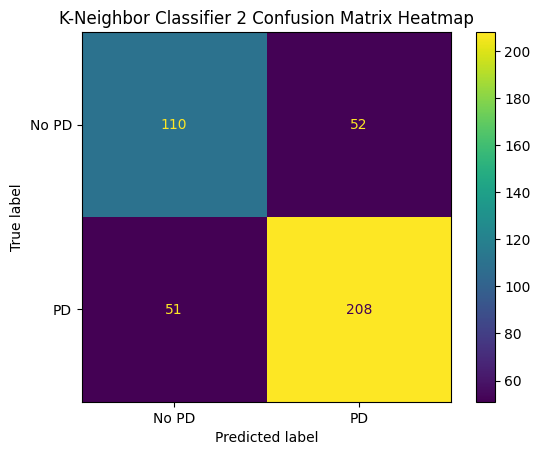

In [310]:
y_pred_knn2=gs_knn2.predict(X_test)
print("K-Neighbor Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_knn2))
print("")
print("K-Neighbor Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_knn2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn2,display_labels=["No PD","PD"])
plt.title("K-Neighbor Classifier 2 Confusion Matrix Heatmap")
plt.show()

- **KNN best model:**   
    
The best KNN model was obtained with the following Preprocessing and Hyperparameters 
   
- Imbalance correction: None
- Scaling and Standarization Methods: StandardScaler. 
- Feature Selection Algorithms: SelectKBest(k=12)
- KNN Neighbors number: 7

In [482]:
gs_knn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': range(2, 10),
                         'feature_selection': [SelectKBest()],
                         'feature_selection__k': range(12, 33),
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             scoring='accuracy', verbose=2)

K-Neighbor Classifier Accuracy Score:
 0.8266033254156769

K-Neighbor Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       162
           1       0.82      0.92      0.87       259

    accuracy                           0.83       421
   macro avg       0.83      0.80      0.81       421
weighted avg       0.83      0.83      0.82       421




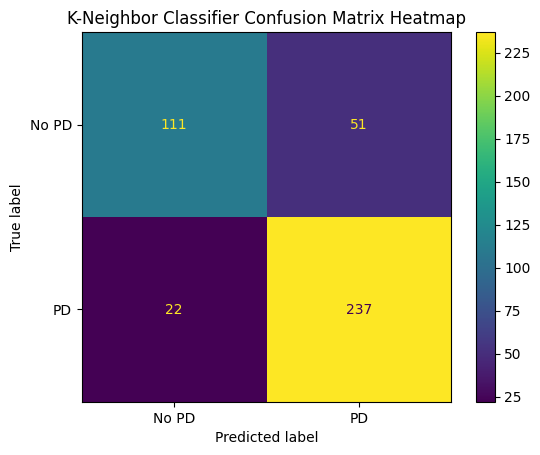

In [483]:
y_pred_knn=gs_knn.predict(X_test)
print("K-Neighbor Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_knn))
print("")
print("K-Neighbor Classifier Classification Report:\n", classification_report(y_test,y_pred_knn))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn,display_labels=["No PD","PD"])
plt.title("K-Neighbor Classifier Confusion Matrix Heatmap")
plt.show()

In [82]:
knn_best_model=gs_knn.best_estimator_
with open('../models/knn_model', 'wb') as archivo_salida:
    pickle.dump(knn_best_model, archivo_salida)

#### **Ensemble Models: Boosting Based Classifiers**
-  **Extreme Gradient Boosting Classifier (XGBC) Model Selection and Cross-Validation**
 
Extreme gradient booting classifiers (XGBC) obtained really good results. Consequently a wider hiperparameters distribution and many preprocessing were cross validated using RandomizedSearch CV methods, with the following options:  
   
- Imbalance correction: SMOTENC, None
- Feature Selection Algorithms: None, SelectKBest(with k between 6 and 32) RFECV (with 2-33 minimun number of features),
- XGBC max depth: between 3 and 15
- XGBC learning rate: uniform distribution between 0.003 and 0.2
- XGBC subsample: between 0.7, 0.8 or 0.9
- XBGC column sample by tree: 0.5, 0.6, 0.7, 0.8, 0.9

In [145]:
params_XGBC= {
    'objective': ['binary:logistic'],
    'max_depth': np.arange(3, 16),
    'learning_rate': scipy.stats.uniform(loc=0.003, scale=0.19),
    'n_estimators': [100],
    'subsample': [0.7,0.8,0.9],
    'colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
    'random_state': [1111]
}

gs_XGBC=RandomizedSearchCV(estimator=XGBClassifier(),n_iter=40,param_distributions=params_XGBC,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_XGBC.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DEBDDEAD50>,
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'n_estimators': [100],
                                        'objective': ['binary:logistic'],
                                        'random_state': [1111],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='accuracy', verbose=2)

Logistic Regression Model Accuracy Score:
 0.9263657957244655

Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       162
           1       0.92      0.97      0.94       259

    accuracy                           0.93       421
   macro avg       0.93      0.91      0.92       421
weighted avg       0.93      0.93      0.93       421




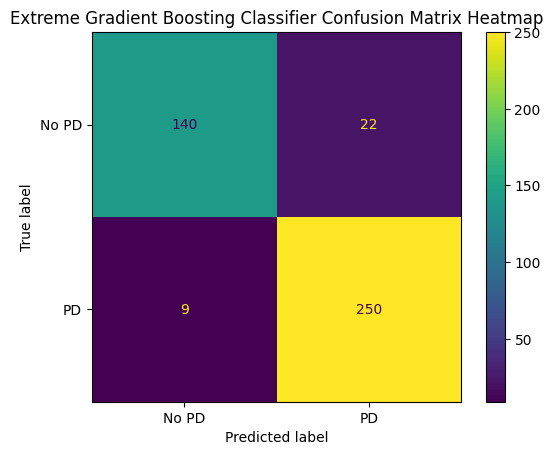

In [ ]:
y_pred_XGBC=gs_XGBC.predict(X_test)
print("Extreme Gradient Boosting Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_XGBC))
print("")
print("Extreme Gradient Boosting Classifier Classification Report:\n", classification_report(y_test,y_pred_XGBC))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_XGBC,display_labels=["No PD","PD"])
plt.title("Extreme Gradient Boosting Classifier Confusion Matrix Heatmap")
plt.show()

In [147]:
XGBC_best_model=gs_XGBC.best_estimator_
with open('../models/XGBC_model', 'wb') as archivo_salida:
    pickle.dump(XGBC_best_model, archivo_salida)

In [229]:
steps_XGBC2=[("imbalance",SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])),("feature_selection",SelectKBest()),('classifier',XGBClassifier())]
pipe_XGBC2=iPipeline(steps=steps_XGBC2)


params_XGBC2= {
    "imbalance":[SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation']),None],
    "feature_selection__k":range(6,33),
    'classifier__objective': ['binary:logistic'],
    'classifier__max_depth': np.arange(3, 16),
    'classifier__learning_rate': scipy.stats.uniform(loc=0.003, scale=0.19),
    'classifier__n_estimators': [100],
    'classifier__subsample': [0.7,0.8,0.9],
    'classifier__colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
    'classifier__random_state': [1111]
}

gs_XGBC2=RandomizedSearchCV(estimator=pipe_XGBC2,n_iter=200,param_distributions=params_XGBC2,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_XGBC2.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__k': range(6, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Extreme Gradient Boosting Classifier 2 Accuracy Score:
 0.9453681710213777

Extreme Gradient Boosting Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       162
           1       0.94      0.97      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.94       421
weighted avg       0.95      0.95      0.95       421




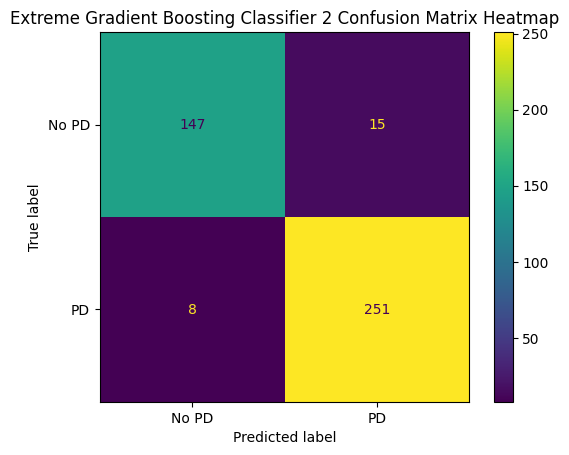

In [230]:
y_pred_XGBC2=gs_XGBC2.predict(X_test)
print("Extreme Gradient Boosting Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_XGBC2))
print("")
print("Extreme Gradient Boosting Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_XGBC2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_XGBC2,display_labels=["No PD","PD"])
plt.title("Extreme Gradient Boosting Classifier 2 Confusion Matrix Heatmap")
plt.show()

In [257]:
XGBC=XGBClassifier()
Imbalance_model=SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])
steps_XGBC3=[("imbalance",Imbalance_model),("feature_selection",RFECV(estimator=XGBC)),('classifier',XGBC)]
pipe_XGBC3=iPipeline(steps=steps_XGBC3)


params_XGBC3 = {
    "imbalance":[Imbalance_model],
    "feature_selection__min_features_to_select":range(2,33),
    'classifier__objective': ['binary:logistic'],
    'classifier__max_depth': np.arange(3, 16),
    'classifier__learning_rate': scipy.stats.uniform(loc=0.003, scale=0.19),
    'classifier__n_estimators': [100],
    'classifier__subsample': [0.7,0.8,0.9],
    'classifier__colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
    'classifier__random_state': [1111]
}

gs_XGBC3=RandomizedSearchCV(estimator=pipe_XGBC3,param_distributions=params_XGBC3,n_iter=200,n_jobs=-1,cv=5)
gs_XGBC3.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__min_features_to_select': range(2, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation'])]})

Extreme Gradient Boosting Classifier 3 Accuracy Score:
 0.9572446555819477

Extreme Gradient Boosting Classifier 3 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       162
           1       0.96      0.97      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.95      0.95       421
weighted avg       0.96      0.96      0.96       421




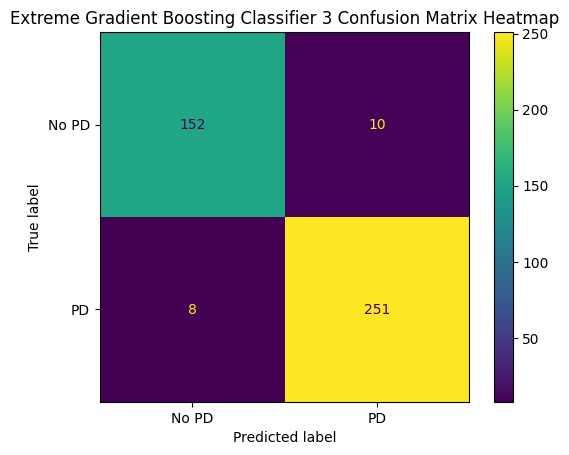

In [258]:
y_pred_XGBC3=gs_XGBC3.predict(X_test)
print("Extreme Gradient Boosting Classifier 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_XGBC3))
print("")
print("Extreme Gradient Boosting Classifier 3 Classification Report:\n", classification_report(y_test,y_pred_XGBC3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_XGBC3,display_labels=["No PD","PD"])
plt.title("Extreme Gradient Boosting Classifier 3 Confusion Matrix Heatmap")
plt.show()

- **XGBC best model**:

The **best XGBC model obtained impresive accuracy of 95.72% and recall of 96.91% in the test array**.
The model was composed of the following pipeline:

- Imbalance correction: SMOTENC
- Feature Selection Algorithms: RFECV (with 15 minimun features to select),
- XGBC max depth: 3
- XGBC learning rate: 0.17987334556031603
- XGBC subsample: between 0.9
- XBGC column sample by tree: 0.7
- XGBC number of estimators: 100

In [490]:
gs_XGBC3

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__min_features_to_select': range(2, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation'])]})

Extreme Gradient Boosting Classifier 3 Accuracy Score:
 0.9572446555819477

Extreme Gradient Boosting Classifier 3 Recall Score:
 0.9691119691119691

Extreme Gradient Boosting Classifier 3 Precision Score:
 0.9616858237547893

Extreme Gradient Boosting Classifier 3 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       162
           1       0.96      0.97      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.95      0.95       421
weighted avg       0.96      0.96      0.96       421




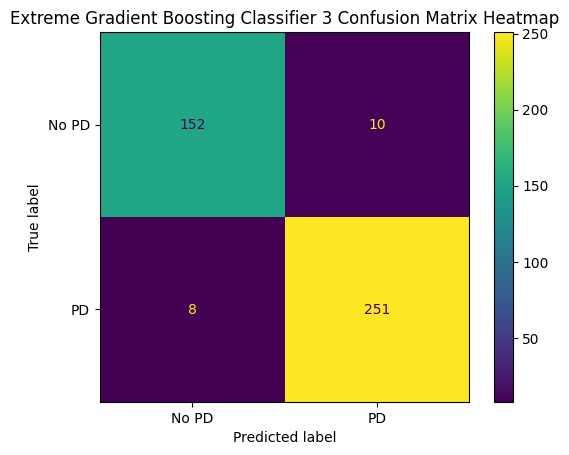

In [533]:
y_pred_XGBC3=gs_XGBC3.predict(X_test)
print("Extreme Gradient Boosting Classifier 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_XGBC3))
print("")
print("Extreme Gradient Boosting Classifier 3 Recall Score:\n", recall_score(y_test,y_pred_XGBC3))
print("")
print("Extreme Gradient Boosting Classifier 3 Precision Score:\n", precision_score(y_test,y_pred_XGBC3))
print("")
print("Extreme Gradient Boosting Classifier 3 Classification Report:\n", classification_report(y_test,y_pred_XGBC3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_XGBC3,display_labels=["No PD","PD"])
plt.title("Extreme Gradient Boosting Classifier 3 Confusion Matrix Heatmap")
plt.show()

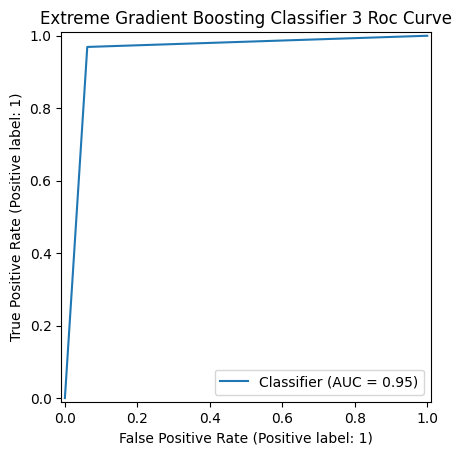

In [497]:
RocCurveDisplay.from_predictions(y_test,y_pred_XGBC3)
plt.title("Extreme Gradient Boosting Classifier 3 Roc Curve")
plt.show()

In [ ]:
XGBC_best_model3=gs_XGBC3.best_estimator_
with open('../models/XGBC_model', 'wb') as archivo_salida:
    pickle.dump(XGBC_best_model, archivo_salida)

-  **Light Gradient Boosting Machine Classifier (lGBMC) Model Selection and Cross-Validation**

For lGBMC the same randomized grid search cross-validation aproach was carried out. The params distributions and pipelines options selected for this model was:  
   
- Imbalance correction: SMOTENC, None
- Feature Selection Algorithms: None, SelectKBest(with k between 6 and 32) RFECV (with 6 minimun number of features),
- lGBMC max depth: between 3 and 15 or None
- lGBMC maximun number of leaves: between 8 and 256
- lGBMC learning rate: uniform distribution between 0.003 and 0.2
- lGBMC subsample: between 0.5 and 1
- lGBMC column sample by tree: between 0.5 and 1
- lGBMC L1 regularization alpha hiperparameter:  0, 0.01, 1, 2, 5, 7, 10, 50 or 100
- lGBMC L2 regularization lambda hiperparameter:  0, 0.01, 1, 5, 10, 20, 50 or 100

In [171]:
import scipy.stats
params_lGBMC= {
    "learning_rate": scipy.stats.uniform(loc=0.003, scale=0.19),  # Default is 0.1. Ranges from loc to loc+scale.
    "num_leaves": scipy.stats.randint(8, 256),  
    "max_depth": np.append(-1, np.arange(3, 16)),  
    "min_child_samples": scipy.stats.randint(5, 300),  
    "subsample": scipy.stats.uniform(loc=0.5, scale=0.5),  
    "colsample_bytree": scipy.stats.uniform(loc=0.5, scale=0.5), 
    "reg_alpha": [0, 0.01, 1, 2, 5, 7, 10, 50, 100],  
    "reg_lambda": [0, 0.01, 1, 5, 10, 20, 50, 100]  
}


gs_lGBMC=RandomizedSearchCV(estimator=LGBMClassifier(),n_iter=2000,param_distributions=params_lGBMC,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_lGBMC.fit(X_train,y_train);

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[LightGBM] [Info] Number of positive: 1045, number of negative: 639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620546 -> initscore=0.491868
[LightGBM] [Info] Start training from score 0.491868
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Light Gradient Boosting Maching Classifier Accuracy Score:
 0.9311163895486936

Light Gradient Boosting Maching Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       162
           1       0.93      0.96      0.94       259

    accuracy                           0.93       421
   macro avg       0.93      0.92      0.93       421
weighted avg       0.93      0.93      0.93       421




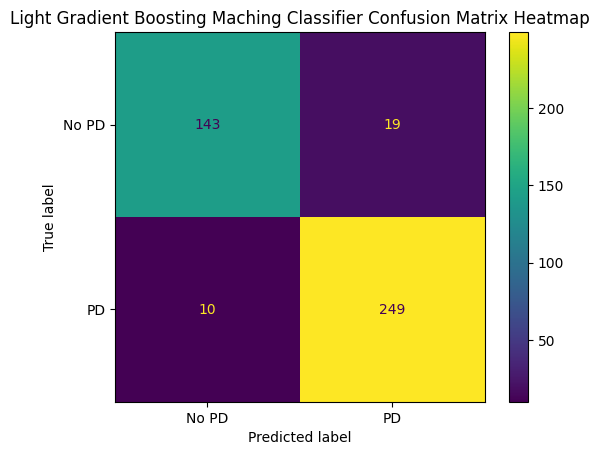

In [199]:
y_pred_lGBMC=gs_lGBMC.predict(X_test)
print("Light Gradient Boosting Maching Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_lGBMC))
print("")
print("Light Gradient Boosting Maching Classifier Classification Report:\n", classification_report(y_test,y_pred_lGBMC))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lGBMC,display_labels=["No PD","PD"])
plt.title("Light Gradient Boosting Maching Classifier Confusion Matrix Heatmap")
plt.show()


In [244]:
steps_lGBMC2=[("imbalance",SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])),("feature_selection",SelectKBest()),('classifier',LGBMClassifier())]
pipe_lGBMC2=iPipeline(steps=steps_lGBMC2)


params_lGBMC2= {
    "imbalance":[SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation']),None],
    "feature_selection__k":range(6,33),
    "classifier__learning_rate": scipy.stats.uniform(loc=0.003, scale=0.19),  # Default is 0.1. Ranges from loc to loc+scale.
    "classifier__num_leaves": scipy.stats.randint(8, 256),  
    "classifier__max_depth": np.append(-1, np.arange(3, 16)),  
    "classifier__min_child_samples": scipy.stats.randint(5, 300),  
    "classifier__subsample": scipy.stats.uniform(loc=0.5, scale=0.5),  
    "classifier__colsample_bytree": scipy.stats.uniform(loc=0.5, scale=0.5), 
    "classifier__reg_alpha": [0, 0.01, 1, 2, 5, 7, 10, 50, 100],  
    "classifier__reg_lambda": [0, 0.01, 1, 5, 10, 20, 50, 100]  
}

gs_lGBMC2=RandomizedSearchCV(estimator=pipe_lGBMC2,n_iter=1000,param_distributions=params_lGBMC2,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_lGBMC2.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[LightGBM] [Info] Number of positive: 1045, number of negative: 1045
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 2090, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__k': range(6, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Light Gradient Boosting Maching Classifier 2 Accuracy Score:
 0.9358669833729216

Light Gradient Boosting Maching Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       162
           1       0.93      0.97      0.95       259

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.93       421
weighted avg       0.94      0.94      0.94       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


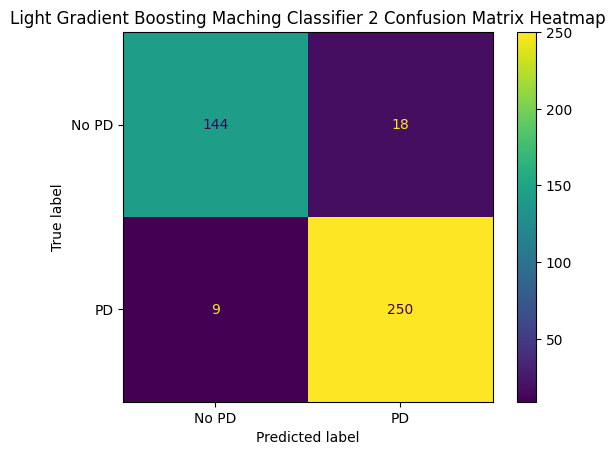

In [247]:
y_pred_lGBMC2=gs_lGBMC2.predict(X_test)
print("Light Gradient Boosting Maching Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_lGBMC2))
print("")
print("Light Gradient Boosting Maching Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_lGBMC2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lGBMC2,display_labels=["No PD","PD"])
plt.title("Light Gradient Boosting Maching Classifier 2 Confusion Matrix Heatmap")
plt.show()

In [ ]:
Imbalance_model=SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])
steps_lGBMC3=[("imbalance",Imbalance_model),("feature_selection",RFECV(estimator=lGBMC,min_features_to_select=6)),('classifier',lGBMC)]
pipe_lGBMC3=iPipeline(steps=steps_lGBMC3)

pipe_lGBMC3.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3289
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing c

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3289
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3283
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2431
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3281
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3267
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: U

[LightGBM] [Info] Number of positive: 836, number of negative: 836
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2172
[LightGBM] [Info] Number of data points in the train set: 1672, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

Pipeline(steps=[('imbalance',
                 SMOTENC(categorical_features=['Gender', 'Ethnicity',
                                               'EducationLevel', 'Smoking',
                                               'FamilyHistoryParkinsons',
                                               'TraumaticBrainInjury',
                                               'Hypertension', 'Diabetes',
                                               'Depression', 'Stroke', 'Tremor',
                                               'Rigidity', 'Bradykinesia',
                                               'PosturalInstability',
                                               'SpeechProblems',
                                               'SleepDisorders',
                                               'Constipation'])),
                ('feature_selection',
                 RFECV(estimator=...
                                                num_leaves=137, reg_alpha=1,
                                                reg_lambda=0.01,
                                                subsample=np.float64(0.65473250991505)),
                       min_features_to_select=6)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=np.float64(0.7053079674473638),
                                learning_rate=np.float64(0.15111116125300147),
                                max_depth=np.int64(5), min_child_samples=94,
                                num_leaves=137, reg_alpha=1, reg_lambda=0.01,
                                subsample=np.float64(0.65473250991505)))])

Light Gradient Boosting Maching Classifier 3 Accuracy Score:
 0.9358669833729216

Light Gradient Boosting Maching Classifier 3 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.91       162
           1       0.94      0.96      0.95       259

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.93       421
weighted avg       0.94      0.94      0.94       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


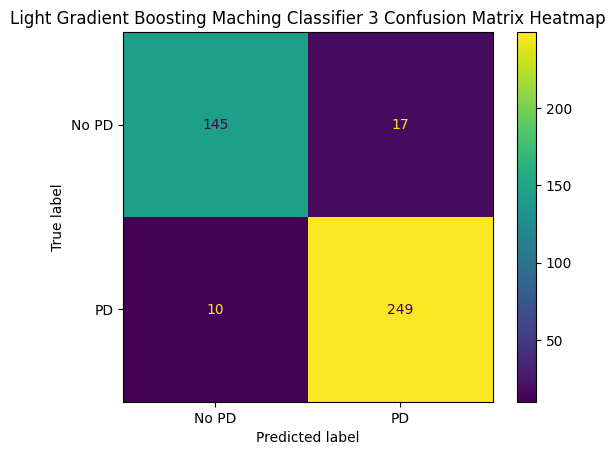

In [511]:

y_pred_lGBMC3=pipe_lGBMC3.predict(X_test)
print("Light Gradient Boosting Maching Classifier 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_lGBMC3))
print("")
print("Light Gradient Boosting Maching Classifier 3 Classification Report:\n", classification_report(y_test,y_pred_lGBMC3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lGBMC3,display_labels=["No PD","PD"])
plt.title("Light Gradient Boosting Maching Classifier 3 Confusion Matrix Heatmap")
plt.show()

-  **Best lGBMC Model**

For lGBMC the same randomized grid search cross-validation aproach was carried out. The params distributions and pipelines options selected for this model was:  
   
- Imbalance correction: SMOTENC
- Feature Selection Algorithms: SelectKBest(k=17) 
- lGBMC boosting type: gbdt
- lGBMC max depth: between 5
- lGBMC number of estimator:100
- lGBMC maximun number of leaves: 137
- lGBMC learning rate: uniform distribution between 0.003 and 0.2
- lGBMC subsample: 0.65473250991505
- lGBMC column sample by tree: 0.7053079674473638
- lGBMC L1 regularization alpha hiperparameter: 1
- lGBMC L2 regularization lambda hiperparameter:  0.01
- lGBMC subsample_for_bin: 200000
- lGBMC min_split_gain: 0.0
- lGBMC min_child_weight: 0.001
- lGBMC min_child_samples: 94
- lGBMC importance_type: split

In [ ]:
gs_lGBMC2

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__k': range(6, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Light Gradient Boosting Maching Classifier 2 Accuracy Score:
 0.9358669833729216

Light Gradient Boosting Maching Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       162
           1       0.93      0.97      0.95       259

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.93       421
weighted avg       0.94      0.94      0.94       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


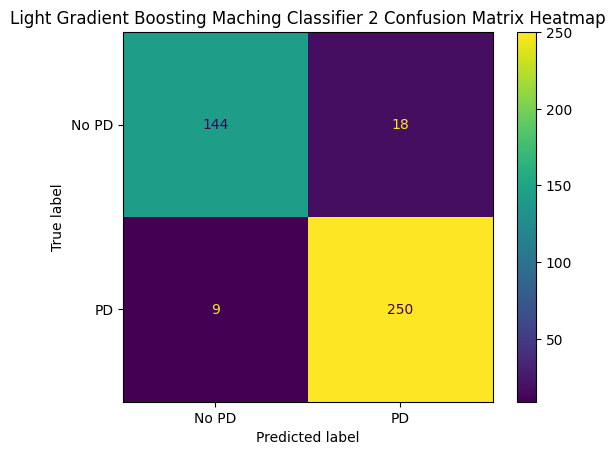

In [ ]:
y_pred_lGBMC2=gs_lGBMC2.predict(X_test)
print("Light Gradient Boosting Maching Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_lGBMC2))
print("")
print("Light Gradient Boosting Maching Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_lGBMC2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lGBMC2,display_labels=["No PD","PD"])
plt.title("Light Gradient Boosting Maching Classifier 2 Confusion Matrix Heatmap")
plt.show()

In [507]:
lGBMC_best_model2=gs_lGBMC2.best_estimator_
with open('../models/lGBMC_model2', 'wb') as archivo_salida:
    pickle.dump(lGBMC_best_model, archivo_salida)

#### **Ensemble Models: Bagging Based Classifiers**
-  **Random Forest Classifier (RF) Model Selection and Cross-Validation**
   
In order to select best RF pipeline and hiperparameters we have repeated the a randomized grid search cross-validation aproach with the following parameters and components:
  
- Imbalance correction: SMOTENC, None
- Feature Selection Algorithms: None, SelectKBest(with k between 6 and 32) RFECV (with 6 minimun number of features),
- RF criterion: gini, entropy or log_loss
- RF number of estimators: 100, 200, 400
- RF class weights: balanced, balanced_subsample or None
- RF cpp_alpha: between 0 and 100
- RF max features: from 2 to 32

In [178]:
params_RF= {"criterion":['gini', 'entropy', 'log_loss'],
            "n_estimators":[200],
            "class_weight":['balanced', 'balanced_subsample',None],
            "random_state":[1111],
            "ccp_alpha":np.arange(0.0001,100,0.0001),
            "max_features":range(6,33)   
}
gs_RF=RandomizedSearchCV(estimator=RandomForestClassifier(),n_iter=2000,param_distributions=params_RF,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_RF.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2000,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': array([1.00000e-04, 2.00000e-04, 3.00000e-04, ..., 9.99997e+01,
       9.99998e+01, 9.99999e+01], shape=(999999,)),
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': range(6, 33),
                                        'n_estimators': [200],
                                        'random_state': [1111]},
                   scoring='accuracy', verbose=2)

Random Forest Classifier Accuracy Score:
 0.8764845605700713

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       162
           1       0.92      0.88      0.90       259

    accuracy                           0.88       421
   macro avg       0.87      0.88      0.87       421
weighted avg       0.88      0.88      0.88       421




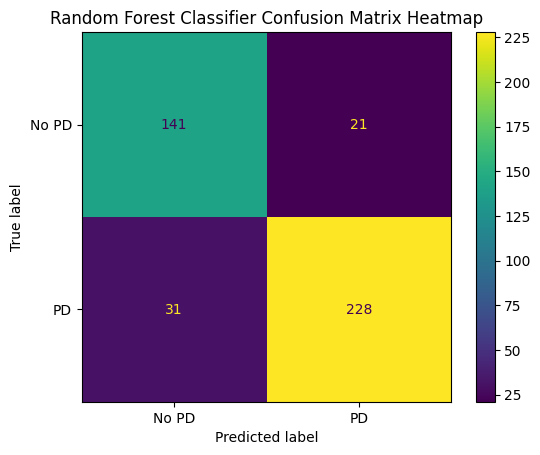

In [193]:
y_pred_RF=gs_RF.predict(X_test)
print("Random Forest Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_RF))
print("")
print("Random Forest Classifier Classification Report:\n", classification_report(y_test,y_pred_RF))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_RF,display_labels=["No PD","PD"])
plt.title("Random Forest Classifier Confusion Matrix Heatmap")
plt.show()

In [275]:
params_RF= {"criterion":['gini', 'entropy', 'log_loss'],
            "class_weight":['balanced', 'balanced_subsample',None],
            "random_state":[1111],
            "max_features":range(1,33),
            "n_estimators":[100,200,400]   
}
gs_RF2=RandomizedSearchCV(estimator=RandomForestClassifier(),n_iter=200,param_distributions=params_RF,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_RF2.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': range(1, 33),
                                        'n_estimators': [100, 200, 400],
                                        'random_state': [1111]},
                   scoring='accuracy', verbose=2)

Random Forest Classifier 2 Accuracy Score:
 0.9334916864608076

Random Forest Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       162
           1       0.93      0.97      0.95       259

    accuracy                           0.93       421
   macro avg       0.94      0.92      0.93       421
weighted avg       0.93      0.93      0.93       421




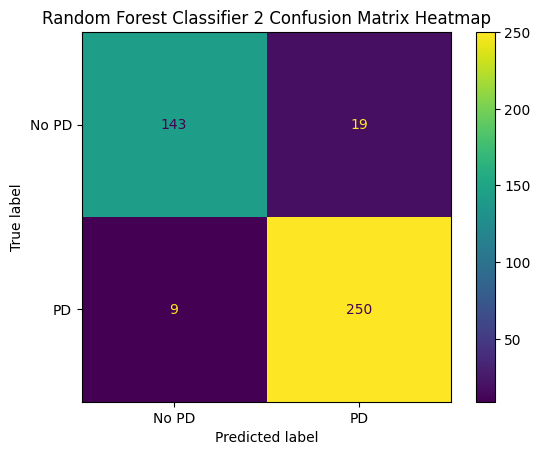

In [276]:
y_pred_RF2=gs_RF2.predict(X_test)
print("Random Forest Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_RF2))
print("")
print("Random Forest Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_RF2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_RF2,display_labels=["No PD","PD"])
plt.title("Random Forest Classifier 2 Confusion Matrix Heatmap")
plt.show()

In [285]:
RF=RandomForestClassifier()
Imbalance_model=SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])
steps_RF3=[("imbalance",Imbalance_model),("feature_selection",RFECV(estimator=RF)),('classifier',RF)]
pipe_RF3=iPipeline(steps=steps_RF3)


params_RF3= {
    "imbalance":[Imbalance_model,None],
    "feature_selection__min_features_to_select":[6],
    "classifier__criterion":['gini', 'entropy', 'log_loss'],
    "classifier__class_weight":['balanced', 'balanced_subsample',None],
    "classifier__random_state":[1111],
    "classifier__max_features":range(1,33),
    "classifier__n_estimators":[100,200,400]   
}

gs_RF3=RandomizedSearchCV(estimator=pipe_RF3,n_iter=20,param_distributions=params_RF3,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_RF3.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__min_features_to_select': [6],
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Random Forest Classifier 3 Accuracy Score:
 0.9334916864608076

Random Forest Classifier 3 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       162
           1       0.93      0.97      0.95       259

    accuracy                           0.93       421
   macro avg       0.94      0.92      0.93       421
weighted avg       0.93      0.93      0.93       421




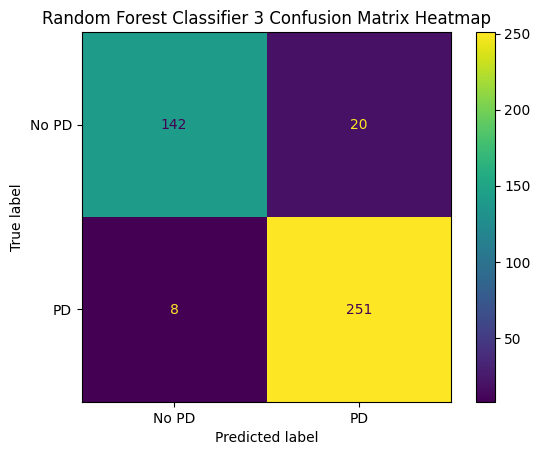

In [286]:
y_pred_RF3=gs_RF3.predict(X_test)
print("Random Forest Classifier 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_RF3))
print("")
print("Random Forest Classifier 3 Classification Report:\n", classification_report(y_test,y_pred_RF3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_RF3,display_labels=["No PD","PD"])
plt.title("Random Forest Classifier 3 Confusion Matrix Heatmap")
plt.show()

In [ ]:
Imbalance_model=SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])
steps_RF4=[("imbalance",Imbalance_model),("feature_selection",SelectKBest()),('classifier',RandomForestClassifier())]
pipe_RF4=iPipeline(steps=steps_RF4)


params_RF4= {
    "imbalance":[Imbalance_model,None],
    "feature_selection__k":range(2,33),
    "classifier__criterion":['gini', 'entropy', 'log_loss'],
    "classifier__class_weight":['balanced', 'balanced_subsample',None],
    "classifier__random_state":[1111],
    "classifier__max_features":range(1,33),
    "classifier__n_estimators":[100,200,400]   
}

gs_RF4=RandomizedSearchCV(estimator=pipe_RF4,n_iter=100,param_distributions=params_RF4,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_RF4.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__k': range(6, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Random Forest Classifier 4 Accuracy Score:
 0.9358669833729216

Random Forest Classifier 4 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       162
           1       0.93      0.97      0.95       259

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.93       421
weighted avg       0.94      0.94      0.94       421




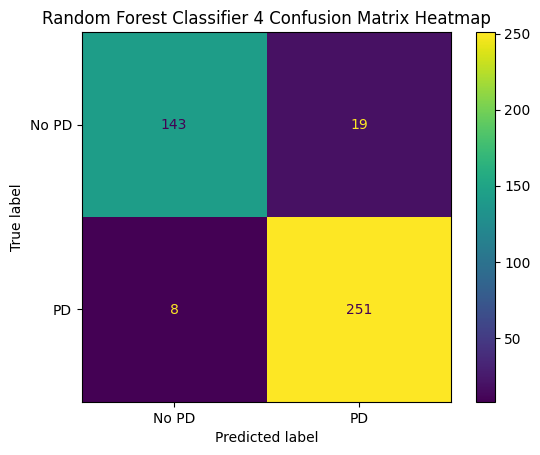

In [284]:
y_pred_RF4=gs_RF4.predict(X_test)
print("Random Forest Classifier 4 Accuracy Score:\n", accuracy_score(y_test,y_pred_RF4))
print("")
print("Random Forest Classifier 4 Classification Report:\n", classification_report(y_test,y_pred_RF4))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_RF4,display_labels=["No PD","PD"])
plt.title("Random Forest Classifier 4 Confusion Matrix Heatmap")
plt.show()

-  **Random Forest Classifier (RF) best model**
   
Random forest best model scores reached a **surprising 94.06% of accuracy and 97.29% recall, the highest of all the models so far.**
  
- Imbalance correction: None
- Feature Selection Algorithms:  SelectKBest(with k=7) 
- RF criterion: gini
- RF max depth: None
- RF number of estimators: 100
- RF class weights: balanced_subsample
- RF cpp_alpha:  0 
- RF max features: 2
- RF bootstrap: True
- RF min_samples_split: 2
- RF min_samples_leaf: 1
- RF min_weight_fraction_leaf: 0
- RF min_impurity_decrease: 0
- RF oob_score: False
- RF warm_start: False

In [ ]:
#In the previous cell during random grid searching I had obtain one of the better models, but due to randomness i could repeat it, hopefully I did saved it 
with open("../models/RF_model", 'rb') as archivo_entrada:
    RF_best_model5 = pickle.load(archivo_entrada)
RF_best_model5

Pipeline(steps=[('imbalance', None), ('feature_selection', SelectKBest(k=7)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_features=2, random_state=1111))])

Random Forest Classifier 5 Accuracy Score:
 0.9406175771971497

Random Forest Classifier 5 Recall Score:
 0.972972972972973

Random Forest Classifier 5 Recall Score:
 0.9333333333333333

Random Forest Classifier 5 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       162
           1       0.93      0.97      0.95       259

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.94       421
weighted avg       0.94      0.94      0.94       421




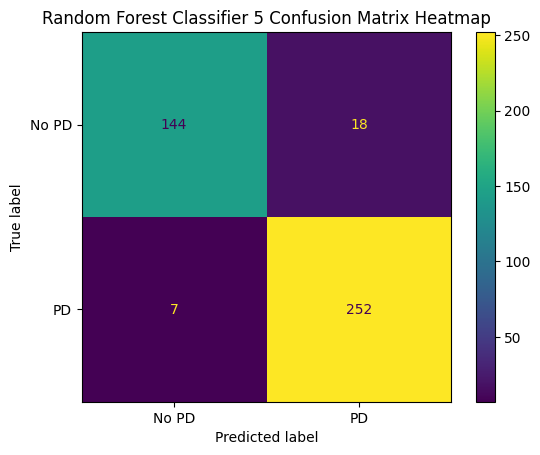

In [ ]:
y_pred_RF5=RF_best_model5.predict(X_test)
print("Random Forest Classifier 5 Accuracy Score:\n", accuracy_score(y_test,y_pred_RF5))
print("")
print("Random Forest Classifier 5 Recall Score:\n", recall_score(y_test,y_pred_RF5))
print("")
print("Random Forest Classifier 5 Classification Report:\n", classification_report(y_test,y_pred_RF5))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_RF5,display_labels=["No PD","PD"])
plt.title("Random Forest Classifier 5 Confusion Matrix Heatmap")
plt.show()

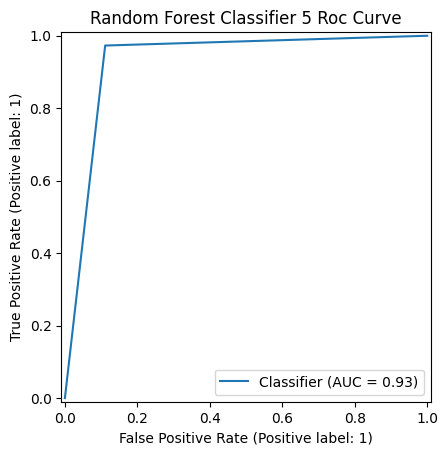

In [520]:
RocCurveDisplay.from_predictions(y_test,y_pred_RF5)
plt.title("Random Forest Classifier 5 Roc Curve")
plt.show()

In [ ]:
RF_best_model=gs_RF5.best_estimator_
with open('../models/RF_model', 'wb') as archivo_salida:
    pickle.dump(RF_best_model, archivo_salida)

-  **Extra Tree Classifier (ETC) Model Selection and Cross-Validation**
   
For hipeparametrization of the extra tree classifier randomized grid search cross-validation was applied following these pipelines and parameters distributions:
  
- Imbalance correction: SMOTENC, None
- Feature Selection Algorithms: None, SelectKBest(with k between 6 and 32) RFECV (with 6 minimun number of features),
- ETC criterion: gini, entropy or log_loss
- ETC number of estimators: 100, 200, 400
- ETC minimum samples to split a node: from 1 to 19
- ETC minimum samples per leaf': from 1 to 19
- ETC max features:from 6 to 32


In [ ]:
params_ETC= {"criterion":['gini', 'entropy', 'log_loss'],
            "class_weight":['balanced', 'balanced_subsample',None],
            "max_features":range(6,33),
            'n_estimators': [100,200,400],
            'min_samples_split': np.arange(2, 20),
            'min_samples_leaf': np.arange(1, 20)
}
gs_ETC=RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=42),n_iter=2000,param_distributions=params_ETC,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_ETC.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=2000, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': range(6, 33),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': range(10, 100)},
                   scoring='accuracy', verbose=2)

Extra Tree Classifier 2 Accuracy Score:
 0.9097387173396675

Extra Tree Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       162
           1       0.90      0.96      0.93       259

    accuracy                           0.91       421
   macro avg       0.91      0.89      0.90       421
weighted avg       0.91      0.91      0.91       421




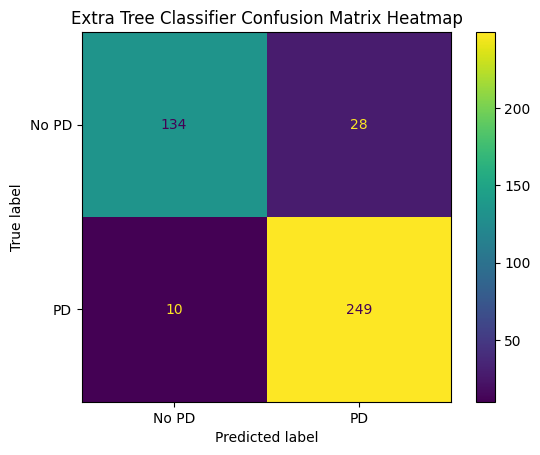

In [358]:
y_pred_ETC=gs_ETC.predict(X_test)
print("Extra Tree Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_ETC))
print("")
print("Extra Tree Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_ETC))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ETC,display_labels=["No PD","PD"])
plt.title("Extra Tree Classifier Confusion Matrix Heatmap")
plt.show()

In [380]:
ETC=ExtraTreesClassifier()
Imbalance_model=SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])
steps_ETC2=[("imbalance",Imbalance_model),("feature_selection",SelectKBest()),('classifier',ETC)]
pipe_ETC2=iPipeline(steps=steps_ETC2)


params_ETC2= {
    "imbalance":[Imbalance_model,None],
    "feature_selection__k":range(6,33),
    "classifier__criterion":['gini', 'entropy', 'log_loss'],
    "classifier__class_weight":['balanced', 'balanced_subsample',None],
    "classifier__random_state":[1111],
    "classifier__max_features":range(1,33),
    "classifier__n_estimators":[200],
}

gs_ETC2=RandomizedSearchCV(estimator=pipe_ETC2,n_iter=1000,param_distributions=params_ETC2,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_ETC2.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__k': range(6, 33),
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Extra Tree Classifier 2 Accuracy Score:
 0.9144893111638955

Extra Tree Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       162
           1       0.90      0.97      0.93       259

    accuracy                           0.91       421
   macro avg       0.92      0.90      0.91       421
weighted avg       0.92      0.91      0.91       421




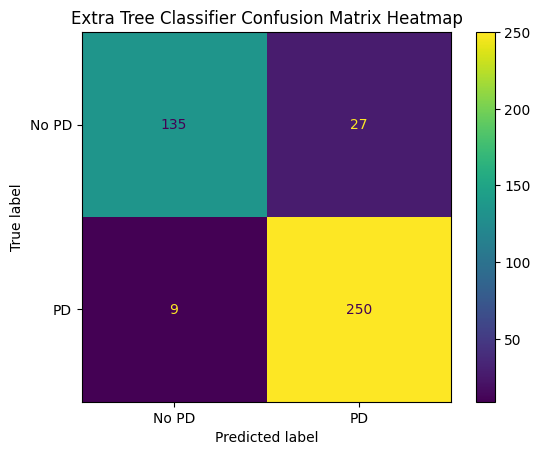

In [ ]:
y_pred_ETC2=gs_ETC2.predict(X_test)
print("Extra Tree Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_ETC2))
print("")
print("Extra Tree Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_ETC2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ETC2,display_labels=["No PD","PD"])
plt.title("Extra Tree Classifier 2 Confusion Matrix Heatmap")
plt.show()

In [385]:
ETC=ExtraTreesClassifier()
Imbalance_model=SMOTENC(categorical_features=['Gender', 'Ethnicity', 'EducationLevel','Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury','Hypertension', 'Diabetes', 'Depression', 'Stroke','Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability','SpeechProblems', 'SleepDisorders', 'Constipation'])
steps_ETC3=[("imbalance",Imbalance_model),("feature_selection",RFECV(estimator=ETC)),('classifier',ETC)]
pipe_ETC3=iPipeline(steps=steps_ETC3)


params_ETC3= {
    "imbalance":[Imbalance_model,None],
    "feature_selection__min_features_to_select":[6],
    "classifier__criterion":['gini', 'entropy', 'log_loss'],
    "classifier__class_weight":['balanced', 'balanced_subsample',None],
    "classifier__random_state":[1111],
    "classifier__max_features":range(1,33),
    "classifier__n_estimators":[200],
}

gs_ETC3=RandomizedSearchCV(estimator=pipe_ETC3,n_iter=50,param_distributions=params_ETC3,cv=5,verbose=2,scoring="accuracy",n_jobs=-1)
gs_ETC3.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__min_features_to_select': [6],
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Extra Tree Classifier 3 Accuracy Score:
 0.9192399049881235

Extra Tree Classifier 3 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       162
           1       0.91      0.97      0.94       259

    accuracy                           0.92       421
   macro avg       0.92      0.91      0.91       421
weighted avg       0.92      0.92      0.92       421




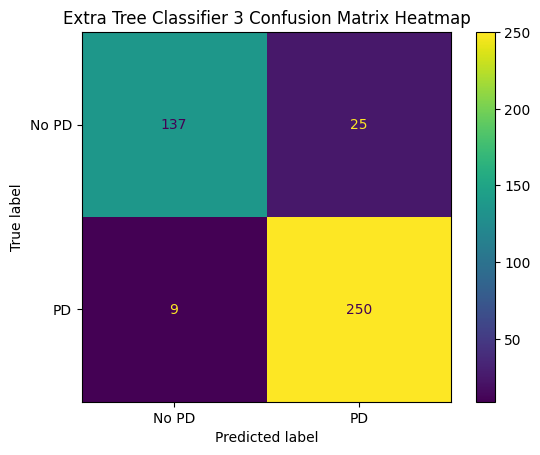

In [386]:
y_pred_ETC3=gs_ETC3.predict(X_test)
print("Extra Tree Classifier 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_ETC3))
print("")
print("Extra Tree Classifier 3 Classification Report:\n", classification_report(y_test,y_pred_ETC3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ETC3,display_labels=["No PD","PD"])
plt.title("Extra Tree Classifier 3 Confusion Matrix Heatmap")
plt.show()

-  **ETC Best Model**
   
The best predictions of a ETC model were obtained with this pipeline adjuntes with the following hiperparametres:
   
- Imbalance correction:  None
- Feature Selection Algorithms:  (with 6 minimun number of features),
- ETC criterion: log_loss
- ETC number of estimators: 200
- ETC minimum samples to split a node: 2
- ETC minimum samples per leaf': 1 
- ETC max features: 17
- ETC minimun weight fraction leaf: 0
- ETC minimun impurity decrease: 0
- ETC bootstrap: False
- ETC oob_score: False
- ETC ccp_alpha: 0

In [524]:
gs_ETC3

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imbalance',
                                              SMOTENC(categorical_features=['Gender',
                                                                            'Ethnicity',
                                                                            'EducationLevel',
                                                                            'Smoking',
                                                                            'FamilyHistoryParkinsons',
                                                                            'TraumaticBrainInjury',
                                                                            'Hypertension',
                                                                            'Diabetes',
                                                                            'Depression',
                                                                            'Stroke',
                                                                            'Tremor',
                                                                            'Rigidity',
                                                                            'Bradykinesia',
                                                                            'PosturalInstability',
                                                                            'SpeechProblems',
                                                                            'SleepDisorders',
                                                                            'Constipation'])),
                                             ('f...
                                        'feature_selection__min_features_to_select': [6],
                                        'imbalance': [SMOTENC(categorical_features=['Gender',
                                                                                    'Ethnicity',
                                                                                    'EducationLevel',
                                                                                    'Smoking',
                                                                                    'FamilyHistoryParkinsons',
                                                                                    'TraumaticBrainInjury',
                                                                                    'Hypertension',
                                                                                    'Diabetes',
                                                                                    'Depression',
                                                                                    'Stroke',
                                                                                    'Tremor',
                                                                                    'Rigidity',
                                                                                    'Bradykinesia',
                                                                                    'PosturalInstability',
                                                                                    'SpeechProblems',
                                                                                    'SleepDisorders',
                                                                                    'Constipation']),
                                                      None]},
                   scoring='accuracy', verbose=2)

Extra Tree Classifier 3 Accuracy Score:
 0.9192399049881235

Extra Tree Classifier 3 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       162
           1       0.91      0.97      0.94       259

    accuracy                           0.92       421
   macro avg       0.92      0.91      0.91       421
weighted avg       0.92      0.92      0.92       421




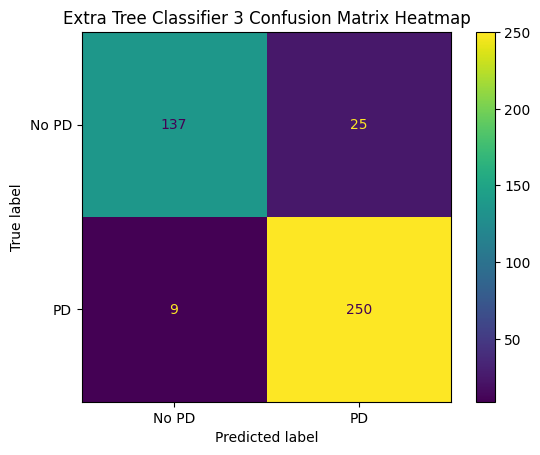

In [523]:
y_pred_ETC3=gs_ETC3.predict(X_test)
print("Extra Tree Classifier 3 Accuracy Score:\n", accuracy_score(y_test,y_pred_ETC3))
print("")
print("Extra Tree Classifier 3 Classification Report:\n", classification_report(y_test,y_pred_ETC3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ETC3,display_labels=["No PD","PD"])
plt.title("Extra Tree Classifier 3 Confusion Matrix Heatmap")
plt.show()

In [525]:
ETC_best_model3=gs_ETC3.best_estimator_
with open('../models/ETC_model', 'wb') as archivo_salida:
    pickle.dump(ETC_best_model3, archivo_salida)

#### **Ensemble Models: Aggregation Based Classifiers**
-  **Voting Model Selection**

Different combination of the previous models were aggregated using hard and soft voting aproaches:

Hard Voting Classifier Accuracy Score:
 0.9168646080760094

Hard Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       162
           1       0.91      0.96      0.93       259

    accuracy                           0.92       421
   macro avg       0.92      0.90      0.91       421
weighted avg       0.92      0.92      0.92       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


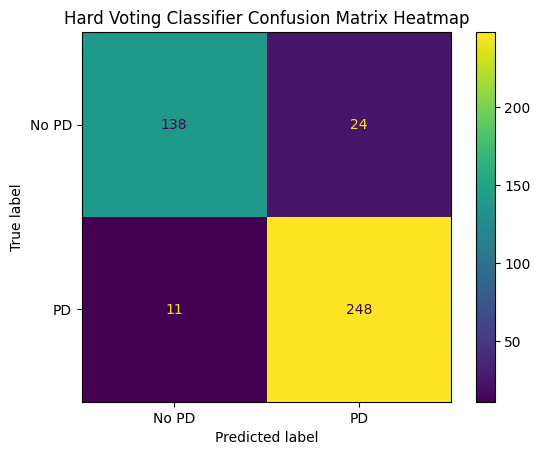

In [ ]:
models=[("ETC",ETC_best_model3),
        ("RF",RF_best_model5),
        ("lGBMC",lGBMC_best_model2),
        ("XGBC3",XGBC_best_model3),
        ("XGBC2",XGBC_best_model2),
        ("KNN",knn_best_model),
        ("SVC_P",svc_k_p_best_model),
        ("SVC_G",svc_k_g_best_model),
        ("SVC_L",svc_k_l_best_model),
        ("lSVC",lsvc_best_model),
        ("log",log_best_model)]
voting_model1=VotingClassifier(estimators=models,n_jobs=-1,voting="hard")
voting_model1.fit(X_train,y_train)
y_pred_voting1=voting_model1.predict(X_test)
print("Hard Voting Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_voting1))
print("")
print("Hard Voting Classifier Classification Report:\n", classification_report(y_test,y_pred_voting1))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting1,display_labels=["No PD","PD"])
plt.title("Hard Voting Classifier Confusion Matrix Heatmap")
plt.show()

Soft Voting Classifier Accuracy Score:
 0.9216152019002375

Soft Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       162
           1       0.92      0.96      0.94       259

    accuracy                           0.92       421
   macro avg       0.92      0.91      0.92       421
weighted avg       0.92      0.92      0.92       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


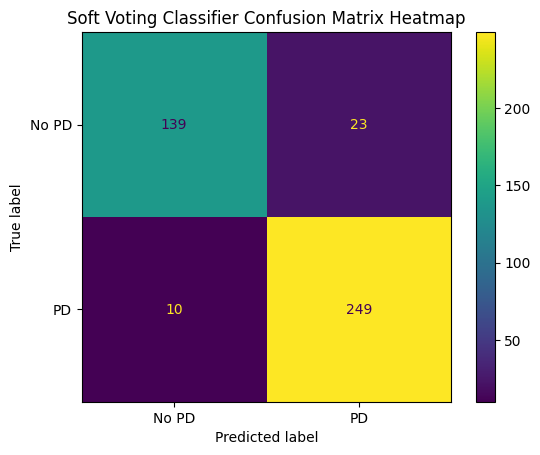

In [ ]:
svc_k_p_best_model.set_params(classifier__probability=True)
svc_k_l_best_model.set_params(classifier__probability=True)
svc_k_g_best_model.set_params(classifier__probability=True)
models2=[("ETC",ETC_best_model3),
        ("RF",RF_best_model5),
        ("lGBMC",lGBMC_best_model2),
        ("XGBC3",XGBC_best_model3),
        ("XGBC2",XGBC_best_model2),
        ("KNN",knn_best_model),
        ("SVC_P",svc_k_p_best_model),
        ("SVC_G",svc_k_g_best_model),
        ("SVC_L",svc_k_l_best_model),
        ("log",log_best_model),
        ("QDA",pipe_qda)]
voting_model2=VotingClassifier(estimators=models2,n_jobs=-1,voting="soft")
voting_model2.fit(X_train,y_train)
y_pred_voting2=voting_model2.predict(X_test)
print("Soft Voting Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_voting2))
print("")
print("Soft Voting Classifier Classification Report:\n", classification_report(y_test,y_pred_voting2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting2,display_labels=["No PD","PD"])
plt.title("Soft Voting Classifier Confusion Matrix Heatmap")
plt.show()

Hard Voting Classifier 2 Accuracy Score:
 0.9548693586698337

Hard Voting Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       162
           1       0.96      0.97      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.95      0.95       421
weighted avg       0.95      0.95      0.95       421




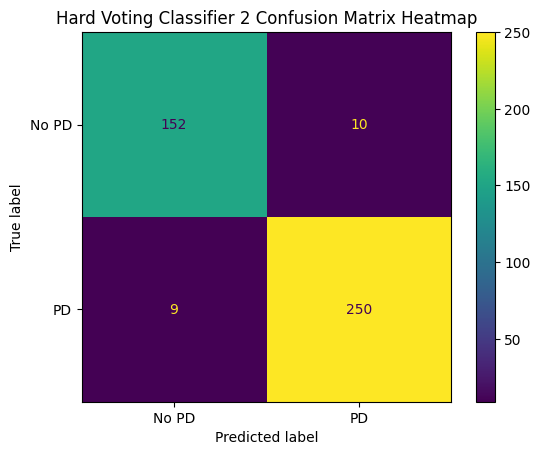

In [388]:
models3=[("RF",RF_best_model5),
        ("XGBC3",XGBC_best_model3),]
voting_model3=VotingClassifier(estimators=models3,n_jobs=-1,voting="hard")
voting_model3.fit(X_train,y_train)
y_pred_voting3=voting_model3.predict(X_test)
print("Hard Voting Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_voting3))
print("")
print("Hard Voting Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_voting3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting3,display_labels=["No PD","PD"])
plt.title("Hard Voting Classifier 2 Confusion Matrix Heatmap")
plt.show()

Soft Voting Classifier 2 Accuracy Score:
 0.9501187648456056

Soft Voting Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       162
           1       0.95      0.97      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.95       421
weighted avg       0.95      0.95      0.95       421




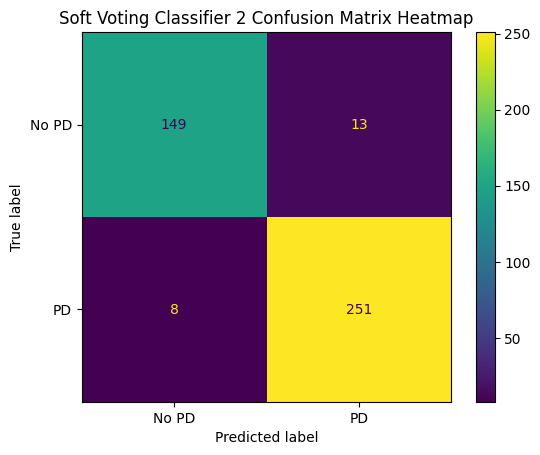

In [389]:
models4=[("RF",RF_best_model5),
        ("XGBC",XGBC_best_model3),]
voting_model4=VotingClassifier(estimators=models4,n_jobs=-1,voting="soft")
voting_model4.fit(X_train,y_train)
y_pred_voting4=voting_model4.predict(X_test)
print("Soft Voting Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_voting4))
print("")
print("Soft Voting Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_voting4))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting4,display_labels=["No PD","PD"])
plt.title("Soft Voting Classifier 2 Confusion Matrix Heatmap")
plt.show()

Soft Voting Classifier 2 Accuracy Score:
 0.9429928741092637

Soft Voting Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       162
           1       0.94      0.97      0.95       259

    accuracy                           0.94       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.94      0.94      0.94       421




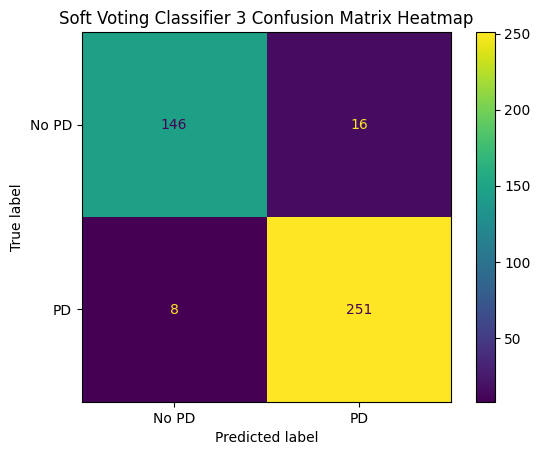

In [397]:
models5=[("RF",RF_best_model5),
        ("XGBC",XGBC_best_model3),]
voting_model5=VotingClassifier(estimators=models5,n_jobs=-1,voting="soft")
voting_model5.fit(X_train,y_train)
y_pred_voting5=voting_model5.predict(X_test)
print("Soft Voting Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_voting5))
print("")
print("Soft Voting Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_voting5))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting5,display_labels=["No PD","PD"])
plt.title("Soft Voting Classifier 3 Confusion Matrix Heatmap")
plt.show()

- **Best Voting Model**

Although voting models could not improve the performance of any of the previous models, the best of the voting models aggregating the best random forest and extreme gradient boosting classifiers. These models are the one with **higher precision (XGBC) in combination with the model with the highest recall (RF)**.

In [526]:
voting_model3

VotingClassifier(estimators=[('RF',
                              Pipeline(steps=[('imbalance', None),
                                              ('feature_selection',
                                               SelectKBest(k=7)),
                                              ('classifier',
                                               RandomForestClassifier(class_weight='balanced_subsample',
                                                                      max_features=2,
                                                                      random_state=1111))])),
                             ('XGBC3',
                              Pipeline(steps=[('imbalance',
                                               SMOTENC(categorical_features=['Gender',
                                                                             'Ethnicity',
                                                                             'EducationLevel',
                                                                             'Smoking',
                                                                             'FamilyHistoryPa...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=np.float64(0.17987334556031603),
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=np.int64(3),
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))]))],
                 n_jobs=-1)

Hard Voting Classifier 2 Accuracy Score:
 0.9548693586698337

Hard Voting Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       162
           1       0.96      0.97      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.95      0.95       421
weighted avg       0.95      0.95      0.95       421




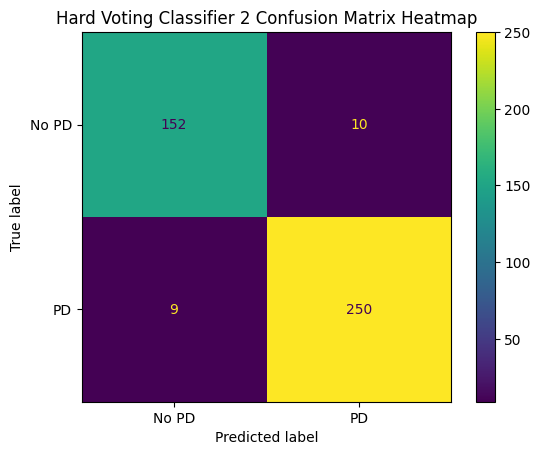

In [534]:
y_pred_voting3=voting_model3.predict(X_test)
print("Hard Voting Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_voting3))
print("")
print("Hard Voting Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_voting3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_voting3,display_labels=["No PD","PD"])
plt.title("Hard Voting Classifier 2 Confusion Matrix Heatmap")
plt.show()

In [398]:
voting_best_model=voting_model3
with open('../models/voting_best_model', 'wb') as archivo_salida:
    pickle.dump(voting_best_model, archivo_salida)

#### **Ensemble Models: Stacking Based Classifiers**
-  **Stacking Model Selection and Cross-Validation**
   
Different combination of the models tested before were aggregated in order to estimate a final prediction using a meta-estimator. Different meta-estimators were tried, adjunting the stacking model with different hiperparameters. Aditionally different random seeds of the best meta-estimator were fixed.

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Stacking Classifier Accuracy Score:
 0.9477434679334917

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       162
           1       0.94      0.98      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.94       421
weighted avg       0.95      0.95      0.95       421




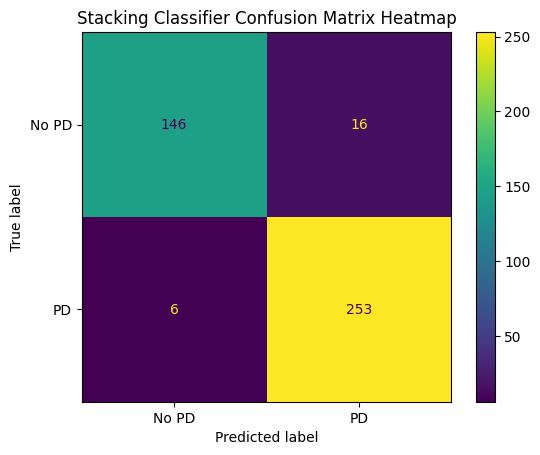

In [ ]:
models=[("ETC",ETC_best_model3),
        ("RF",RF_best_model5),
        ("lGBMC",lGBMC_best_model2),
        ("XGBC3",XGBC_best_model3),
        ("KNN",knn_best_model),
        ("SVC_P",svc_k_p_best_model),
        ("SVC_G",svc_k_g_best_model),
        ("SVC_L",svc_k_l_best_model),
        ("lSVC",lsvc_best_model),
        ("log",log_best_model)]
stacking_model1=StackingClassifier(estimators=models,final_estimator=XGBClassifier(),cv=5,n_jobs=-1,passthrough=True)
stacking_model1.fit(X_train,y_train)
y_pred_stacking1=stacking_model1.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking1))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking1))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking1,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9453681710213777

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       162
           1       0.94      0.98      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.94       421
weighted avg       0.95      0.95      0.94       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


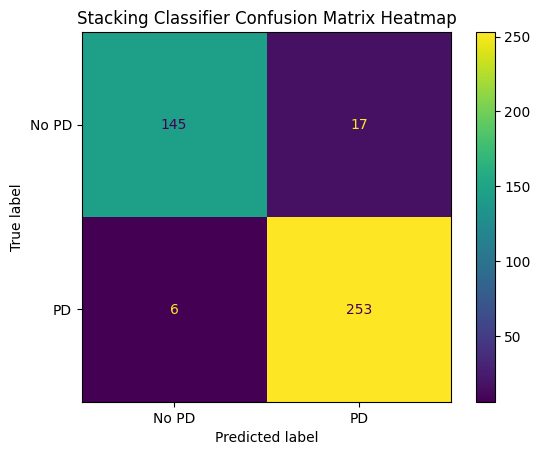

In [ ]:
models=[("ETC",ETC_best_model3),
        ("RF",RF_best_model5),
        ("lGBMC",lGBMC_best_model2),
        ("XGBC3",XGBC_best_model3),
        ("KNN",knn_best_model),
        ("SVC_P",svc_k_p_best_model),
        ("SVC_G",svc_k_g_best_model),
        ("SVC_L",svc_k_l_best_model),
        ("lSVC",lsvc_best_model),
        ("log",log_best_model)]
stacking_model2=StackingClassifier(estimators=models,final_estimator=RandomForestClassifier(),cv=5,n_jobs=-1,passthrough=True)
stacking_model2.fit(X_train,y_train)
y_pred_stacking2=stacking_model2.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking2))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking2,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9524940617577197

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       162
           1       0.95      0.97      0.96       259

    accuracy                           0.95       421
   macro avg       0.95      0.95      0.95       421
weighted avg       0.95      0.95      0.95       421




c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


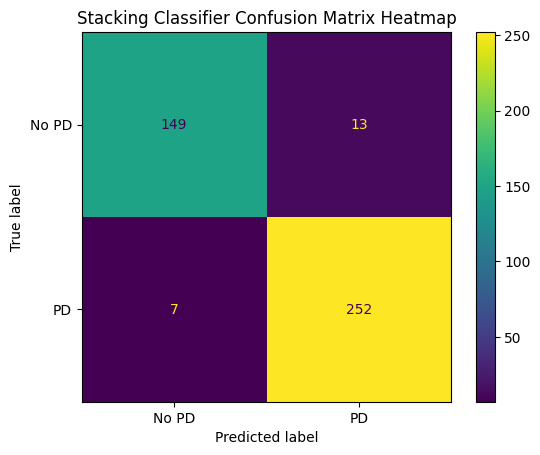

In [410]:
models=[("ETC",ETC_best_model3),
        ("RF",RF_best_model5),
        ("lGBMC",lGBMC_best_model2),
        ("XGBC3",XGBC_best_model3),
]
stacking_model3=StackingClassifier(estimators=models,final_estimator=XGBClassifier(),cv=5,n_jobs=-1,passthrough=True)
stacking_model3.fit(X_train,y_train)
y_pred_stacking3=stacking_model3.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking3))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking3,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9619952494061758

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       162
           1       0.97      0.97      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.96      0.96       421
weighted avg       0.96      0.96      0.96       421




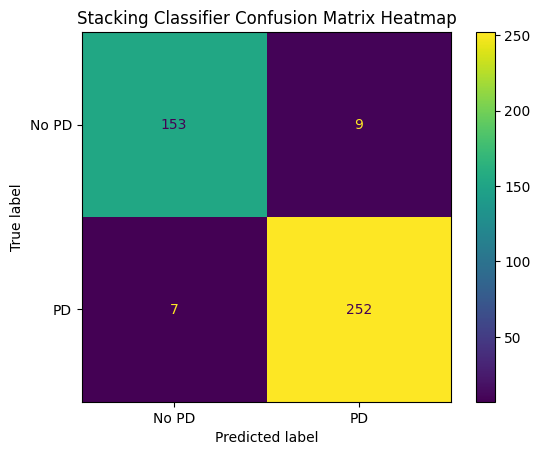

In [418]:
models=[("RF",RF_best_model5),
        ("XGBC3",XGBC_best_model3),
]
stacking_model3=StackingClassifier(estimators=models,final_estimator=XGBClassifier(),cv=5,n_jobs=-1,passthrough=True)
stacking_model3.fit(X_train,y_train)
y_pred_stacking3=stacking_model3.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking3))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking3,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9572446555819477

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.96      0.97      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.95      0.95       421
weighted avg       0.96      0.96      0.96       421




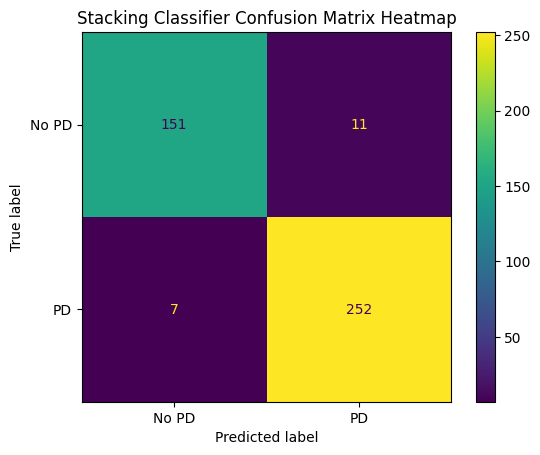

In [435]:
models=[("RF",RF_best_model5),
        ("XGBC3",XGBC_best_model3),
]
stacking_model3=StackingClassifier(estimators=models,final_estimator=XGBClassifier(random_state=1111),cv=5,n_jobs=-1,passthrough=True,stack_method="predict_proba")
stacking_model3.fit(X_train,y_train)
y_pred_stacking3=stacking_model3.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking3))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking3,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9643705463182898

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       162
           1       0.97      0.97      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.96      0.96       421
weighted avg       0.96      0.96      0.96       421




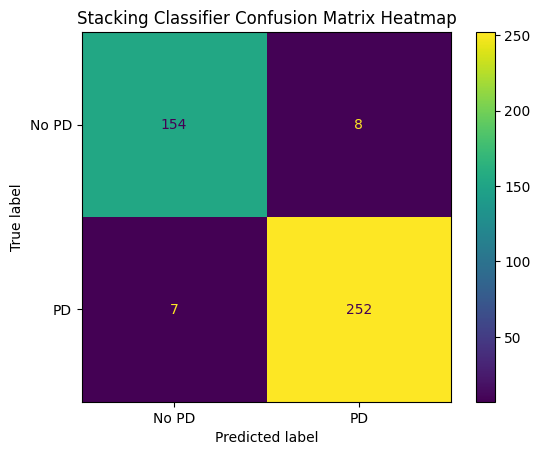

In [437]:
models=[("RF",RF_best_model5),
        ("XGBC3",XGBC_best_model3),
]
stacking_model3=StackingClassifier(estimators=models,final_estimator=XGBClassifier(random_state=111),cv=5,n_jobs=-1,passthrough=True,stack_method="predict_proba")
stacking_model3.fit(X_train,y_train)
y_pred_stacking3=stacking_model3.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking3))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking3,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9643705463182898

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       162
           1       0.97      0.97      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.96      0.96       421
weighted avg       0.96      0.96      0.96       421




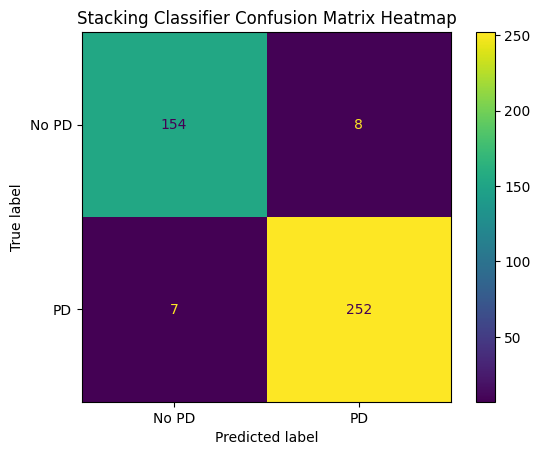

In [439]:
with open("../models/stacking_best_model2", 'rb') as archivo_entrada:
    final_model = pickle.load(archivo_entrada)
y_pred_final_model=final_model.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_final_model))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_final_model))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final_model,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

Stacking Classifier Accuracy Score:
 0.9572446555819477

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.95      0.98      0.97       259

    accuracy                           0.96       421
   macro avg       0.96      0.95      0.95       421
weighted avg       0.96      0.96      0.96       421




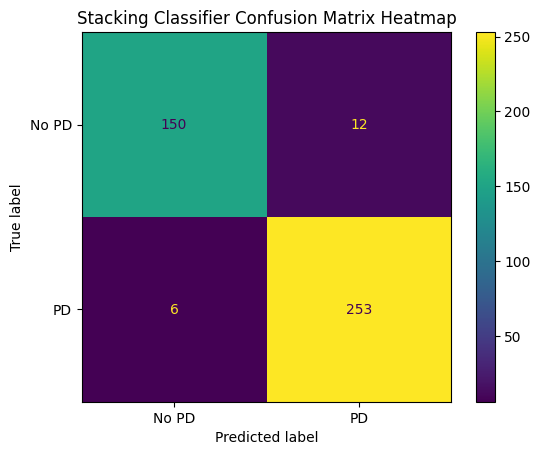

In [441]:
models=[("RF",RF_best_model5),
        ("XGBC3",XGBC_best_model3),
]
stacking_model3=StackingClassifier(estimators=models,final_estimator=XGBClassifier(random_state=12),cv=5,n_jobs=-1,passthrough=True,stack_method="predict_proba")
stacking_model3.fit(X_train,y_train)
y_pred_stacking3=stacking_model3.predict(X_test)
print("Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking3))
print("")
print("Stacking Classifier Classification Report:\n", classification_report(y_test,y_pred_stacking3))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_stacking3,display_labels=["No PD","PD"])
plt.title("Stacking Classifier Confusion Matrix Heatmap")
plt.show()

In [443]:
models=[("RF",RF_best_model5),
        ("XGBC3",XGBC_best_model3),
]
for i in range (1,100):
    stacking_model3=StackingClassifier(estimators=models,final_estimator=XGBClassifier(random_state=i),cv=5,n_jobs=-1,passthrough=True,stack_method="predict_proba")
    stacking_model3.fit(X_train,y_train)
    y_pred_stacking3=stacking_model3.predict(X_test)
    print(i,"Stacking Classifier Accuracy Score:\n", accuracy_score(y_test,y_pred_stacking3),confusion_matrix(y_test,y_pred_stacking3))


1 Stacking Classifier Accuracy Score:
 0.9524940617577197 [[151  11]
 [  9 250]]
2 Stacking Classifier Accuracy Score:
 0.9548693586698337 [[151  11]
 [  8 251]]
3 Stacking Classifier Accuracy Score:
 0.9501187648456056 [[147  15]
 [  6 253]]
4 Stacking Classifier Accuracy Score:
 0.9572446555819477 [[152  10]
 [  8 251]]
5 Stacking Classifier Accuracy Score:
 0.9524940617577197 [[150  12]
 [  8 251]]
6 Stacking Classifier Accuracy Score:
 0.9548693586698337 [[150  12]
 [  7 252]]
7 Stacking Classifier Accuracy Score:
 0.9477434679334917 [[147  15]
 [  7 252]]
8 Stacking Classifier Accuracy Score:
 0.9596199524940617 [[151  11]
 [  6 253]]
9 Stacking Classifier Accuracy Score:
 0.9524940617577197 [[150  12]
 [  8 251]]
10 Stacking Classifier Accuracy Score:
 0.9477434679334917 [[150  12]
 [ 10 249]]
11 Stacking Classifier Accuracy Score:
 0.9501187648456056 [[149  13]
 [  8 251]]
12 Stacking Classifier Accuracy Score:
 0.9524940617577197 [[150  12]
 [  8 251]]
13 Stacking Classifier Ac

- **Stacking Best Models:**  
   
The best stacking models were obtained **combining the model with higher precision (XGBC) in combination with the model with the highest recall (RF) stacked with another XGBC as meta-estimator** of these two models. This model achieved the **best accuracy** of almost **97%** and **percentages above 95% in the rest of the scores**. This stacking model resulted in **just 7 False Positives and 6 False Negatives in the  421 samples of the test.**

In [550]:
with open("../models/stacking_model1", 'rb') as archivo_entrada:
    stacking_best_model1 = pickle.load(archivo_entrada)
stacking_best_model1

StackingClassifier(cv=5,
                   estimators=[('RF',
                                Pipeline(steps=[('imbalance', None),
                                                ('feature_selection',
                                                 SelectKBest(k=7)),
                                                ('classifier',
                                                 RandomForestClassifier(class_weight='balanced_subsample',
                                                                        max_features=2,
                                                                        random_state=1111))])),
                               ('XGBC3',
                                Pipeline(steps=[('imbalance',
                                                 SMOTENC(categorical_features=['Gender',
                                                                               'Ethnicity',
                                                                               'EducationLevel',
                                                                               'Smoking',
                                                                               'FamilyHi...
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   n_jobs=-1, passthrough=True, stack_method='predict_proba')

Stacking Best Classifier 1 Accuracy Score:
 0.9691211401425178

Stacking Best Classifier 1 Precision Score:
 0.9730769230769231

Stacking Best Classifier 1 Recall Score:
 0.9768339768339769

Stacking Best Classifier 1 F1 Score:
 0.9749518304431599

Stacking Best Classifier 1 Specificity Score:
 0.9567901234567902

Stacking Best Classifier 1 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       162
           1       0.97      0.98      0.97       259

    accuracy                           0.97       421
   macro avg       0.97      0.97      0.97       421
weighted avg       0.97      0.97      0.97       421




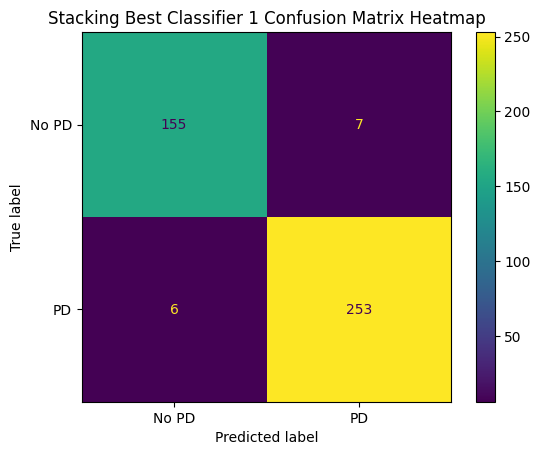

In [566]:
y_pred_best_stacking1=stacking_best_model1.predict(X_test)
print("Stacking Best Classifier 1 Accuracy Score:\n", accuracy_score(y_test,y_pred_best_stacking1))
print("")
print("Stacking Best Classifier 1 Precision Score:\n", precision_score(y_test,y_pred_best_stacking1))
print("")
print("Stacking Best Classifier 1 Recall Score:\n", recall_score(y_test,y_pred_best_stacking1))
print("")
print("Stacking Best Classifier 1 F1 Score:\n", f1_score(y_test,y_pred_best_stacking1))
print("")
print("Stacking Best Classifier 1 Specificity Score:\n",  specificity_score(y_test,y_pred_best_stacking1))
print("")
print("Stacking Best Classifier 1 Classification Report:\n", classification_report(y_test,y_pred_best_stacking1))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_best_stacking1,display_labels=["No PD","PD"])
plt.title("Stacking Best Classifier 1 Confusion Matrix Heatmap")
plt.show()

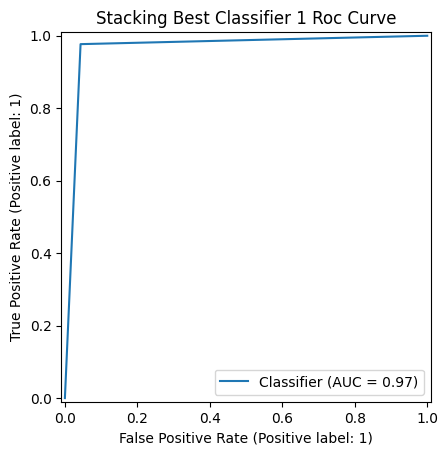

In [564]:
RocCurveDisplay.from_predictions(y_test,y_pred_best_stacking1)
plt.title("Stacking Best Classifier 1 Roc Curve")
plt.show()

Aditionally if we want to maximize the recall and sensitivity the secong stacking model seems like the better option. This model achieved the **best recall or sensitibity** reaching a **98.07%** and **percentages above 93% in the rest of the scores**. Using this aproach **only 5 of the 259 patients** diagnosed with Parkinson's Disease the were in the test dataset **weren't detected**.
This model was built with the same estimators and meta-estimators, but just changing the meta-estimator random seed.

In [552]:
with open("../models/stacking_model2", 'rb') as archivo_entrada:
    stacking_best_model2 = pickle.load(archivo_entrada)
stacking_best_model2

StackingClassifier(cv=5,
                   estimators=[('RF',
                                Pipeline(steps=[('imbalance', None),
                                                ('feature_selection',
                                                 SelectKBest(k=7)),
                                                ('classifier',
                                                 RandomForestClassifier(class_weight='balanced_subsample',
                                                                        max_features=2,
                                                                        random_state=1111))])),
                               ('XGBC3',
                                Pipeline(steps=[('imbalance',
                                                 SMOTENC(categorical_features=['Gender',
                                                                               'Ethnicity',
                                                                               'EducationLevel',
                                                                               'Smoking',
                                                                               'FamilyHi...
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   n_jobs=-1, passthrough=True, stack_method='predict_proba')

Stacking Best Classifier 2 Accuracy Score:
 0.9643705463182898

Stacking Best Classifier 2 Precision Score:
 0.9621212121212122

Stacking Best Classifier 2 Recall Score:
 0.9806949806949807

Stacking Best Classifier 2 F1 Score:
 0.97131931166348

Stacking Best Classifier 2 Specificity Score:
 0.9382716049382716

Stacking Best Classifier 2 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       162
           1       0.96      0.98      0.97       259

    accuracy                           0.96       421
   macro avg       0.97      0.96      0.96       421
weighted avg       0.96      0.96      0.96       421




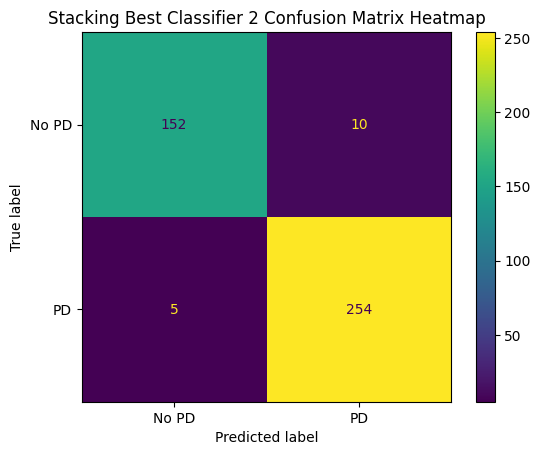

In [567]:
y_pred_best_stacking2=stacking_best_model2.predict(X_test)
print("Stacking Best Classifier 2 Accuracy Score:\n", accuracy_score(y_test,y_pred_best_stacking2))
print("")
print("Stacking Best Classifier 2 Precision Score:\n", precision_score(y_test,y_pred_best_stacking2))
print("")
print("Stacking Best Classifier 2 Recall Score:\n", recall_score(y_test,y_pred_best_stacking2))
print("")
print("Stacking Best Classifier 2 F1 Score:\n", f1_score(y_test,y_pred_best_stacking2))
print("")
print("Stacking Best Classifier 2 Specificity Score:\n",  specificity_score(y_test,y_pred_best_stacking2))
print("")
print("Stacking Best Classifier 2 Classification Report:\n", classification_report(y_test,y_pred_best_stacking2))
print("")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_best_stacking2,display_labels=["No PD","PD"])
plt.title("Stacking Best Classifier 2 Confusion Matrix Heatmap")
plt.show()

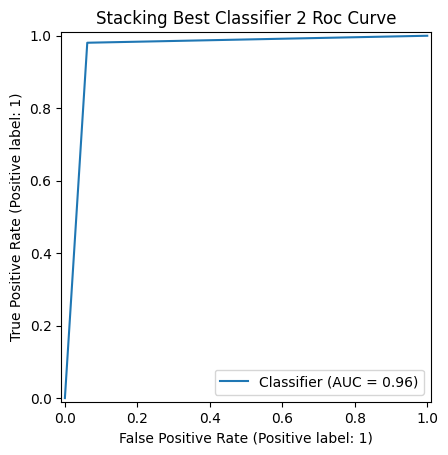

In [565]:
RocCurveDisplay.from_predictions(y_test,y_pred_best_stacking2)
plt.title("Stacking Best Classifier 2 Roc Curve")
plt.show()